### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## By: Christian Chen

[My GitHub repository (Link)](https://github.com/CrispyChen/Chen_Christian_DA301_Assignment)

## Assignment: Predicting Future Outcomes

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `remuneration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/remuneration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

### 1.1. Prepare your workstation

**Disable auto-scrolling in all cell outputs for cleanness**

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

**Import all relevant libraries and settings for analysis**

In [2]:
# Import the necessary libraries for intitial analysis.
import numpy as np
import pandas as pd

# Import additional useful libraries.
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import random
import statsmodels.stats.api as sms
from sklearn import datasets 
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [3]:
# Import the necessary libraries for data visualisation.
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

In [4]:
# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

# Optional - Get multiple outputs in the same cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

### 1.2. Importing and sense checking the data

In [5]:
# Import and sense-check the turtle_reviews.csv data. Name the DataFrame "reviews".
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame by:
# 1. Checking the shape,
# 2. Checking the data types,
# 3. Checking the metadata,
# 4. Viewing the DataFrame.
print("DataFrame shape:")
display(reviews.shape)
print()  # Print blank line for clarity.
print("DataFrame data types:")
display(reviews.dtypes)
print()  # Print blank line for clarity.
print("DataFrame metadata:")
display(reviews.info())
print()  # Print blank line for clarity.
print("DataFrame preview:")
display(reviews)

DataFrame shape:


(2000, 11)


DataFrame data types:


gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object


DataFrame metadata:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


None


DataFrame preview:


gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     education language platform  product  \
0     graduate       EN      Web      453   
1     graduate       EN      Web      466   
2     graduate       EN      Web      254   
3     graduate       EN      Web      263   
4     graduate       EN      Web      291   
...        ...      ...      ...      ...   
1995       PhD       EN      Web      977   
1996       PhD       EN      Web      979   
1997  graduate       EN      Web     1012   
1998       PhD       EN      Web     1031   
1999       PhD       EN      Web      453   

                                                 review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 11 columns]

### 1.3. Checking for missing values and duplicates

**Functions:**

In [6]:
def df_null(df, **kwargs):
    '''Build function that checks for missing values in DataFrame, and returns either:
    1. The DataFrame containing only rows with null values,
    2. Said DataFrame with null values highlighted in red (for visual checks).'''
    
    # Create a DataFrame subset containing missing values using isna().
    df_na = df[df.isna().any(axis=1)]
    
    # Provide optional keyword argument to highlight null values in red (if any exist).
    highlight = kwargs.get('highlight', None)
    
    # Return output DataFrame (or styler, if highlight=1)
    if highlight == 1:
        return df_na.style.highlight_null('red')
    else:
        return df_na

Example of function in action:

In [7]:
# Create a temporary DataFrame.
# Since this is a test, we only need a few rows.
df_temp = reviews.copy().head()

# Randomly populate it with sporadic null values.
random.seed(42)  # Seed randomness for reproducability.
df_temp['age'] = df_temp['age'].sample(frac=0.5)

# Display function output without highlight.
# Add docstring for clarity.
print("DataFrame without optional highlight:")
display(df_null(df_temp))
print()  # Print blank line for clarity.

# Display function output with highlight.
# Add docstring for clarity.
print("DataFrame with optional highlight:")
display(df_null(df_temp, highlight=1))

# Clear temporary variables to free up memory.
del df_temp

DataFrame without optional highlight:


gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male  NaN              12.30                      39             210   
3  Female  NaN              13.12                      77             562   
4  Female  NaN              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
3                                         Five Stars  
4                                         Money trap


DataFrame with optional highlight:


**Outputs:**

In [8]:
# Any missing values?
# Determine whether there are missing values in turtle_reviews.csv.
reviews_na = df_null(reviews)

# Print the number of rows that have a NaN value.
# Add docstring for clarity.
print("The number of rows that have missing values:", reviews_na.shape[0])

# View the DataFrame containing only rows with null values.
if reviews_na.shape[0] != 0:
    display(reviews_na)

The number of rows that have missing values: 0


In [9]:
# Check for duplicate rows.
# Add docstring for clarity.
print("The number of duplicate rows:", reviews_na.shape[0])

The number of duplicate rows: 0


### 1.4. Reviewing the descriptive statistics.

In [10]:
# Determine the descriptive statistics of data set turtle_reviews.csv.
display(reviews.describe())

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

## 2. Drop columns

In [11]:
# Drop unnecessary columns ("language" and "platform").
# Use "try-except" in case columns have already been deleted.
try:
    reviews.drop(columns=['language', 'platform'], inplace=True)
except:
    reviews = reviews

# View column names.
print("New column names:")
display(reviews.columns.values)

New column names:


array(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype=object)

## 3. Rename columns

In [12]:
# Rename the column headers.
# Use "try-except" in case columns have already been deleted.
try:
    reviews.rename(columns={'remuneration (k£)':'remuneration',  # Fixed typo.
                            'spending_score (1-100)':'spending_score'}, inplace=True)
except:
    reviews = reviews

# View column names.
print("New column names:")
display(reviews.columns.values)

New column names:


array(['gender', 'age', 'remuneration', 'spending_score',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype=object)

## 4. Save the DataFrame as a CSV file

In [13]:
# Create a CSV file as output.
reviews.to_csv('turtle_reviews_clean.csv', index=False)

In [14]:
# Import and sense-check the new turtle_reviews_clean.csv data. Name the DataFrame "reviews".
reviews = pd.read_csv('turtle_reviews_clean.csv')

# View the DataFrame by:
# 1. Checking the shape,
# 2. Checking the data types,
# 3. Checking the metadata,
# 4. Viewing the DataFrame.
print("DataFrame shape:")
display(reviews.shape)
print()  # Print blank line for clarity.
print("DataFrame data types:")
display(reviews.dtypes)
print()  # Print blank line for clarity.
print("DataFrame metadata:")
display(reviews.info())
print()  # Print blank line for clarity.
print("DataFrame preview:")
display(reviews)

DataFrame shape:


(2000, 9)


DataFrame data types:


gender             object
age                 int64
remuneration      float64
spending_score      int64
loyalty_points      int64
education          object
product             int64
review             object
summary            object
dtype: object


DataFrame metadata:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


None


DataFrame preview:


gender  age  remuneration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0         453  When it comes to a DM's screen, the space on t...   
1         466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2         254  Nice art, nice printing.  Why two panels are f...   
3         263  Amazing buy! Bought it as a gift for our new d...   
4         291  As my review of GF9's previous screens these w...   
...       ...                                                ...   
1995      977  The perfect word game for mixed ages (with Mom...   
1996      979  Great game.  Did not think I would like it whe...   
1997     1012  Great game for all.........\nKeeps the mind ni...   
1998     1031                                          fun game!   
1999      453  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 9 columns]

## 5. Linear regression

### 5a) Spending vs loyalty

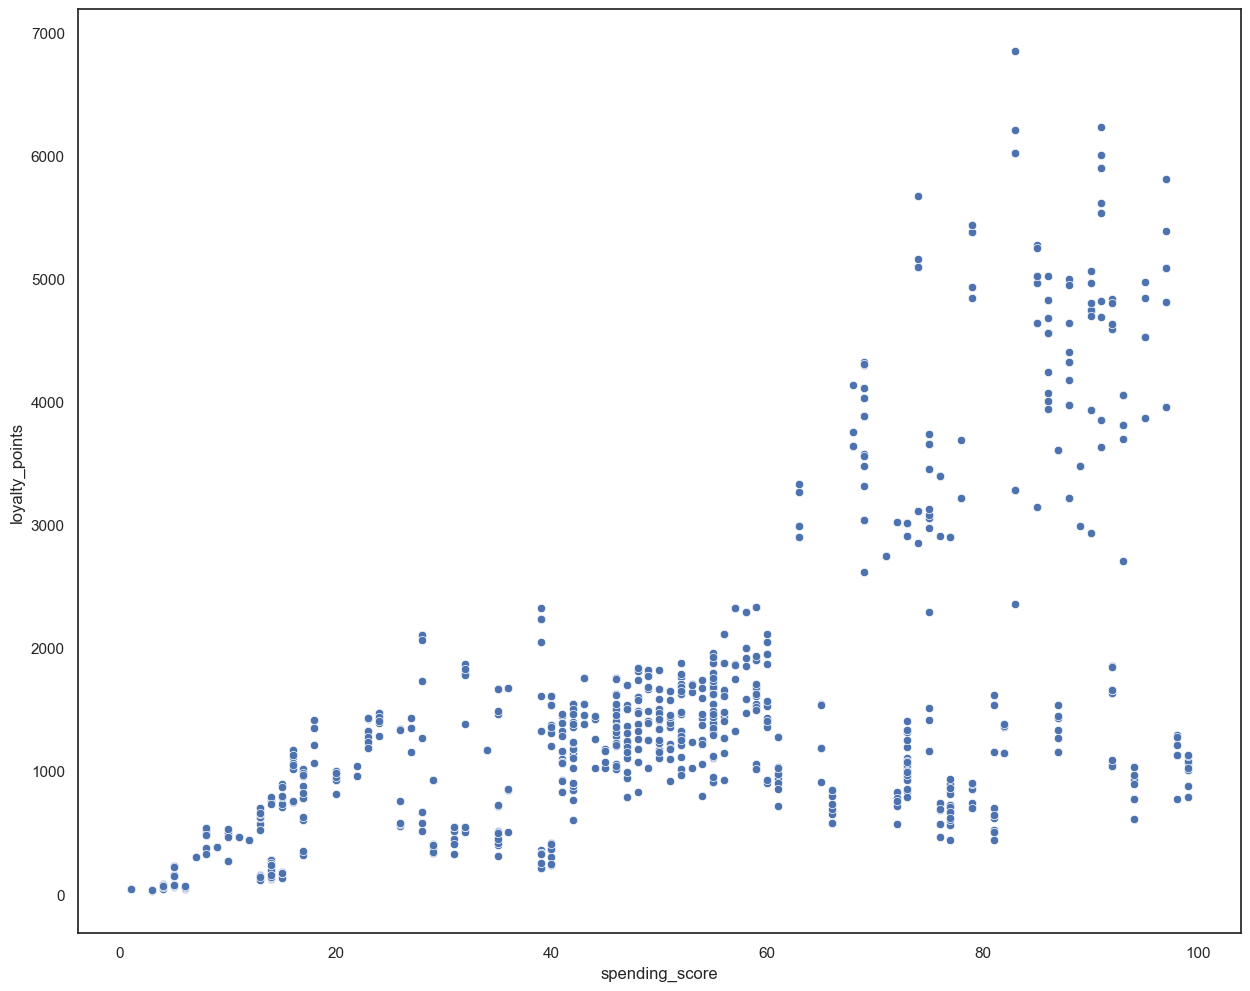

In [15]:
# Independent variable.
x_a = reviews['spending_score']

# Dependent variable.
y_a = reviews['loyalty_points']

# Check for linearity.
sns.scatterplot(x_a, y_a);  # Semicolon to remove extraneous output.

In [16]:
# OLS model and summary.
# Create R-style formula 'y ~ x' and pass through OLS methods.
f_a = 'y_a ~ x_a'
test_a = ols(f_a, data=reviews).fit()

# Print the regression table.
display(test_a.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    y_a   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          2.92e-263
Time:                        15:14:33   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x_a           33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Extract the estimated parameters.
print("Parameters:", test_a.params)  
print()  # Print blank line for clarity.

# Extract the standard errors.
print("Standard errors:", test_a.bse)  
print()  # Print blank line for clarity.

# Extract the predicted values.
print("Predicted values:", test_a.predict())

Parameters: Intercept   -75.052663
x_a          33.061693
dtype: float64

Standard errors: Intercept    45.930554
x_a           0.814419
dtype: float64

Predicted values: [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [18]:
# Create the linear regression model.
# Set the X coefficient (gradient) and the constant (y-intercept) to generate the regression table.
y_a_pred = test_a.params[0] + test_a.params[1]*x_a

# View the output.
print("Predicted y values:")
display(y_a_pred)

Predicted y values:


0       1214.353374
1       2602.944491
2        123.317497
3       2470.697718
4       1247.415067
           ...     
1995    2206.204172
1996     189.440883
1997    2933.561424
1998     453.934429
1999     189.440883
Name: spending_score, Length: 2000, dtype: float64

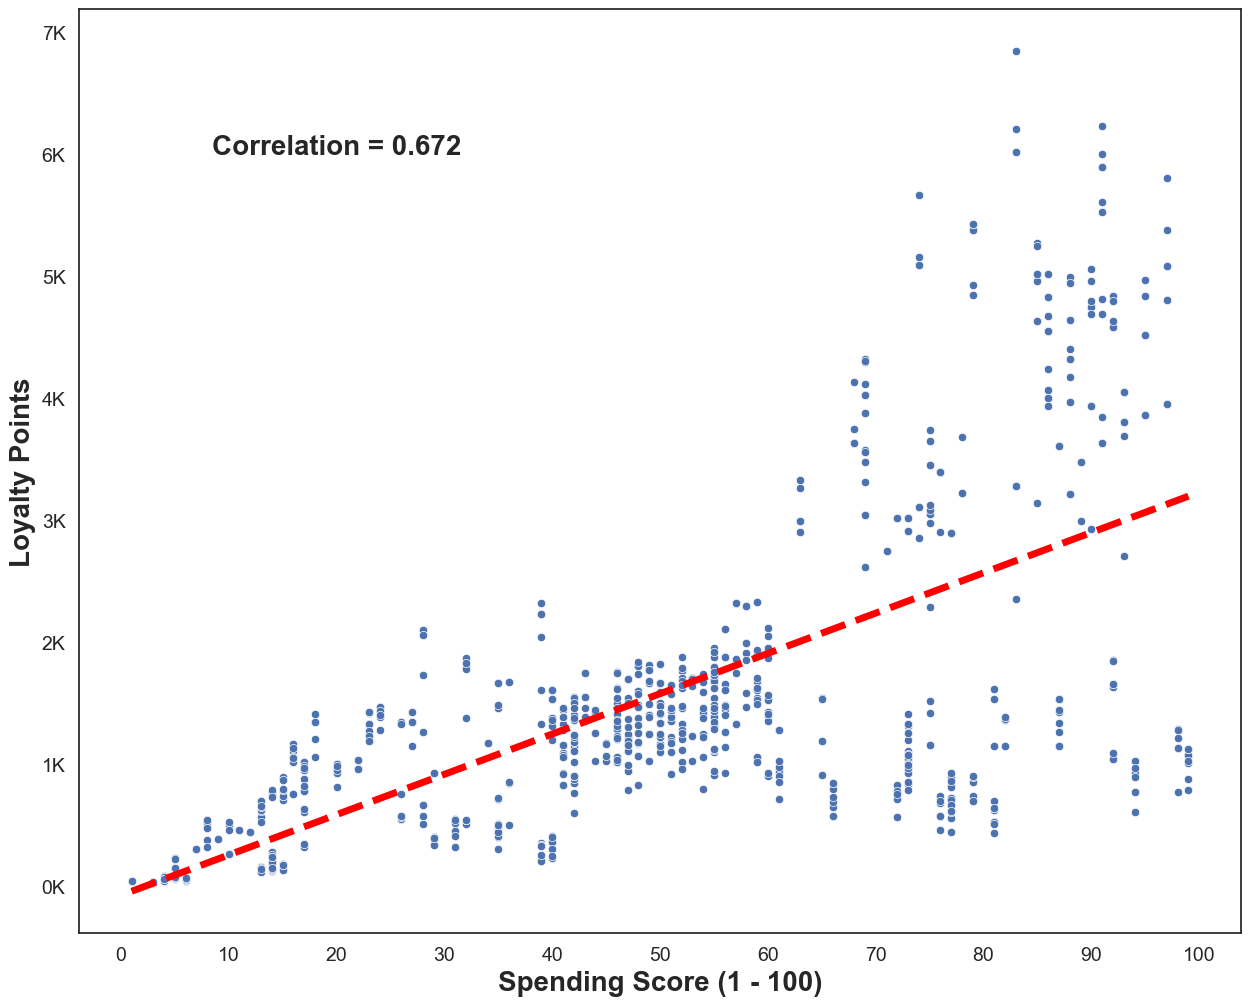

In [19]:
# Plot the graph with a regression line.
# Plot the data points with a scatterplot.
ax1 = sns.scatterplot(x_a, y_a,
                      ci=None)

# Plot the regression line (in red).
ax2 = sns.lineplot(x_a, y_a_pred, 
                   color='red',
                   linewidth=5, linestyle='dashed',
                   ci=None)

# Add comment on correlation.
c = round(x_a.corr(y_a), 3)
ax1.annotate(f'Correlation = {c}', 
             xy=(20,6e3),
             horizontalalignment='center', fontsize=20, weight='bold')

# Adjust x axis.
plt.xlabel("Spending Score (1 - 100)", weight='bold', size=20)
plt.xlim()
# Adjust y axis
plt.ylabel("Loyalty Points", weight='bold', size=20)
plt.ylim()

# Adjust x ticks.
xtick_positions = range(0, 100+10, 10)
plt.xticks(xtick_positions, fontsize=14)
# Adjust y ticks.
ytick_positions = range(0, int(7e3)+int(1e3), int(1e3))
ytick_labels = [f'{round(float(x)/1e3)}K' for x in ytick_positions]
plt.yticks(ytick_positions, ytick_labels, fontsize=14)

# Save figure as .png file for later use.
plt.savefig('cor_loyal_spend.png', dpi=300, bbox_inches='tight');  # Semicolon to remove extraneous output.

### 5b) Remuneration vs loyalty

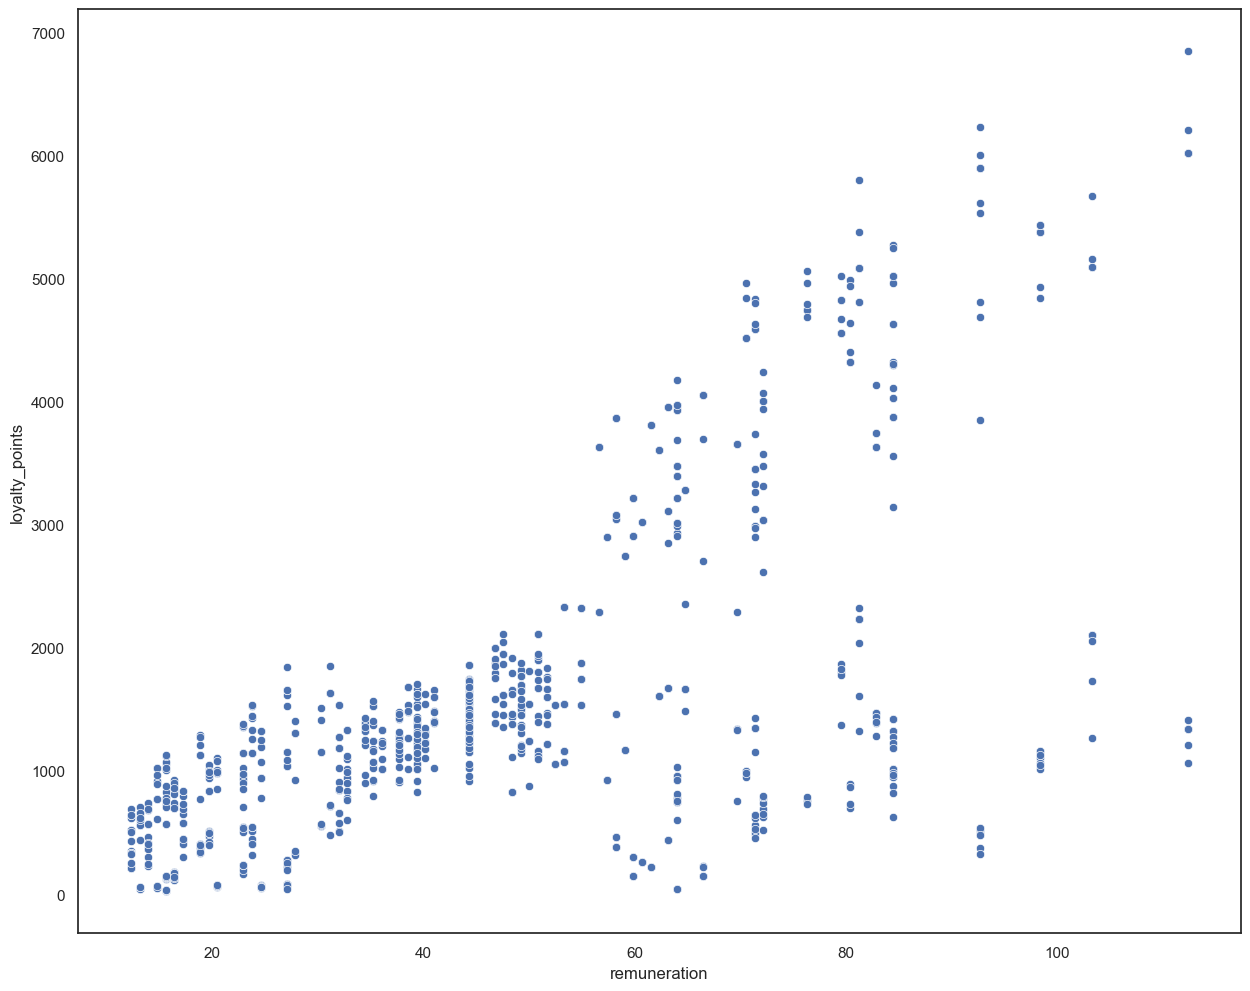

In [20]:
# Independent variable.
x_b = reviews['remuneration']

# Dependent variable.
y_b = reviews['loyalty_points']

# Check for linearity.
sns.scatterplot(x_b, y_b);  # Semicolon to remove extraneous output.

In [21]:
# OLS model and summary.
# Create R-style formula 'y ~ x' and pass through OLS methods.
f_b = 'y_b ~ x_b'
test_b = ols(f_b, data=reviews).fit()

# Print the regression table.
display(test_b.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    y_b   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          2.43e-209
Time:                        15:14:35   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x_b           34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# Extract the estimated parameters.
print("Parameters:", test_b.params)  
print()  # Print blank line for clarity.

# Extract the standard errors.
print("Standard errors:", test_b.bse)  
print()  # Print blank line for clarity.

# Extract the predicted values.
print("Predicted values:", test_b.predict())

Parameters: Intercept   -65.686513
x_b          34.187825
dtype: float64

Standard errors: Intercept    52.170717
x_b           0.977925
dtype: float64

Predicted values: [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [23]:
# Create the linear regression model.
# Set the X coefficient (gradient) and the constant (y-intercept) to generate the regression table.
y_b_pred = test_b.params[0] + test_b.params[1]*x_b

# View the output.
print("Predicted y values:")
display(y_b_pred)

Predicted y values:


0        354.823741
1        354.823741
2        382.857758
3        382.857758
4        410.891774
           ...     
1995    2821.817228
1996    3102.157397
1997    3102.157397
1998    3298.395515
1999    3102.157397
Name: remuneration, Length: 2000, dtype: float64

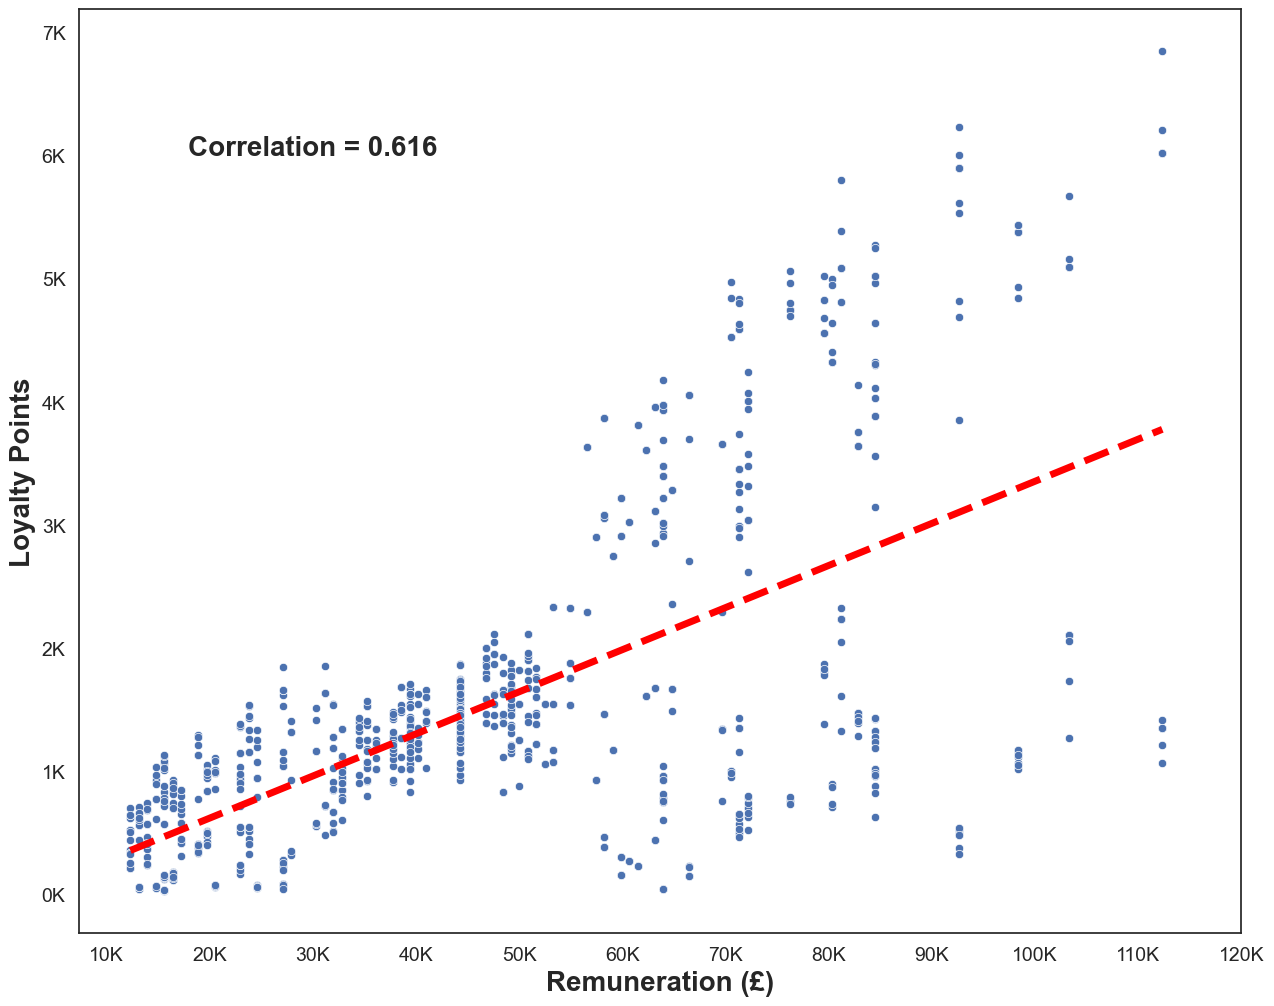

In [24]:
# Plot the graph with a regression line.
# Plot the data points with a scatterplot.
ax1 = sns.scatterplot(x_b, y_b,
                      ci=None)

# Plot the regression line (in red).
ax2 = sns.lineplot(x_b, y_b_pred, 
                   color='red',
                   linewidth=5, linestyle='dashed',
                   ci=None)

# Add comment on correlation.
c = round(x_b.corr(y_b), 3)
ax1.annotate(f'Correlation = {c}', 
             xy=(30,6e3),
             horizontalalignment='center', fontsize=20, weight='bold')

# Adjust x axis.
plt.xlabel("Remuneration (£)", weight='bold', size=20)
plt.xlim()
# Adjust y axis
plt.ylabel("Loyalty Points", weight='bold', size=20)
plt.ylim()

# Adjust x ticks.
xtick_positions = range(10, 120+10, 10)
xtick_labels = [f'{round(float(x))}K' for x in xtick_positions]
plt.xticks(xtick_positions, xtick_labels, fontsize=14)
# Adjust y ticks.
ytick_positions = range(0, int(7e3)+int(1e3), int(1e3))
ytick_labels = [f'{round(float(x)/1e3)}K' for x in ytick_positions]
plt.yticks(ytick_positions, ytick_labels, fontsize=14)

# Save figure as .png file for later use.
plt.savefig('cor_loyal_remun.png', dpi=300, bbox_inches='tight');  # Semicolon to remove extraneous output.

### 5c) Age vs loyalty

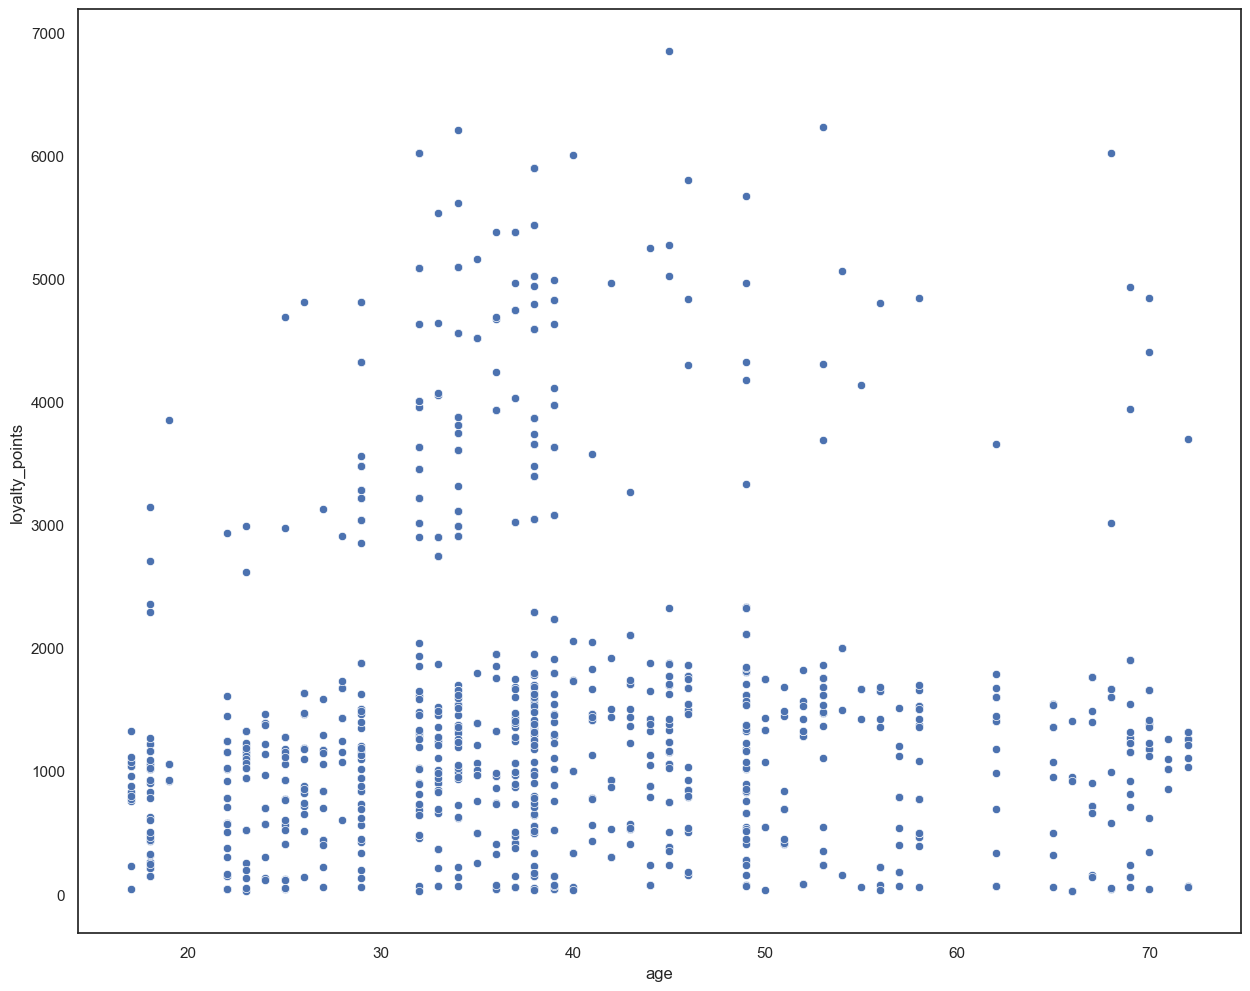

In [25]:
# Independent variable.
x_c = reviews['age']

# Dependent variable.
y_c = reviews['loyalty_points']

# Check for linearity.
sns.scatterplot(x_c, y_c);  # Semicolon to remove extraneous output.

In [26]:
# OLS model and summary.
# Create R-style formula 'y ~ x' and pass through OLS methods.
f_c = 'y_c ~ x_c'
test_c = ols(f_c, data=reviews).fit()

# Print the regression table.
display(test_c.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    y_c   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Mon, 24 Jul 2023   Prob (F-statistic):             0.0577
Time:                        15:14:36   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x_c           -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# Extract the estimated parameters.
print("Parameters:", test_c.params)  
print()  # Print blank line for clarity.

# Extract the standard errors.
print("Standard errors:", test_c.bse)  
print()  # Print blank line for clarity.

# Extract the predicted values.
print("Predicted values:", test_c.predict())

Parameters: Intercept    1736.517739
x_c            -4.012805
dtype: float64

Standard errors: Intercept    88.248731
x_c           2.113177
dtype: float64

Predicted values: [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [28]:
# Create the linear regression model.
# Set the X coefficient (gradient) and the constant (y-intercept) to generate the regression table.
y_c_pred = test_c.params[0] + test_c.params[1]*x_a

# View the output.
print("Predicted y values:")
display(y_c_pred)

Predicted y values:


0       1580.018339
1       1411.480522
2       1712.440908
3       1427.531743
4       1576.005533
           ...     
1995    1459.634184
1996    1704.415298
1997    1371.352471
1998    1672.312857
1999    1704.415298
Name: spending_score, Length: 2000, dtype: float64

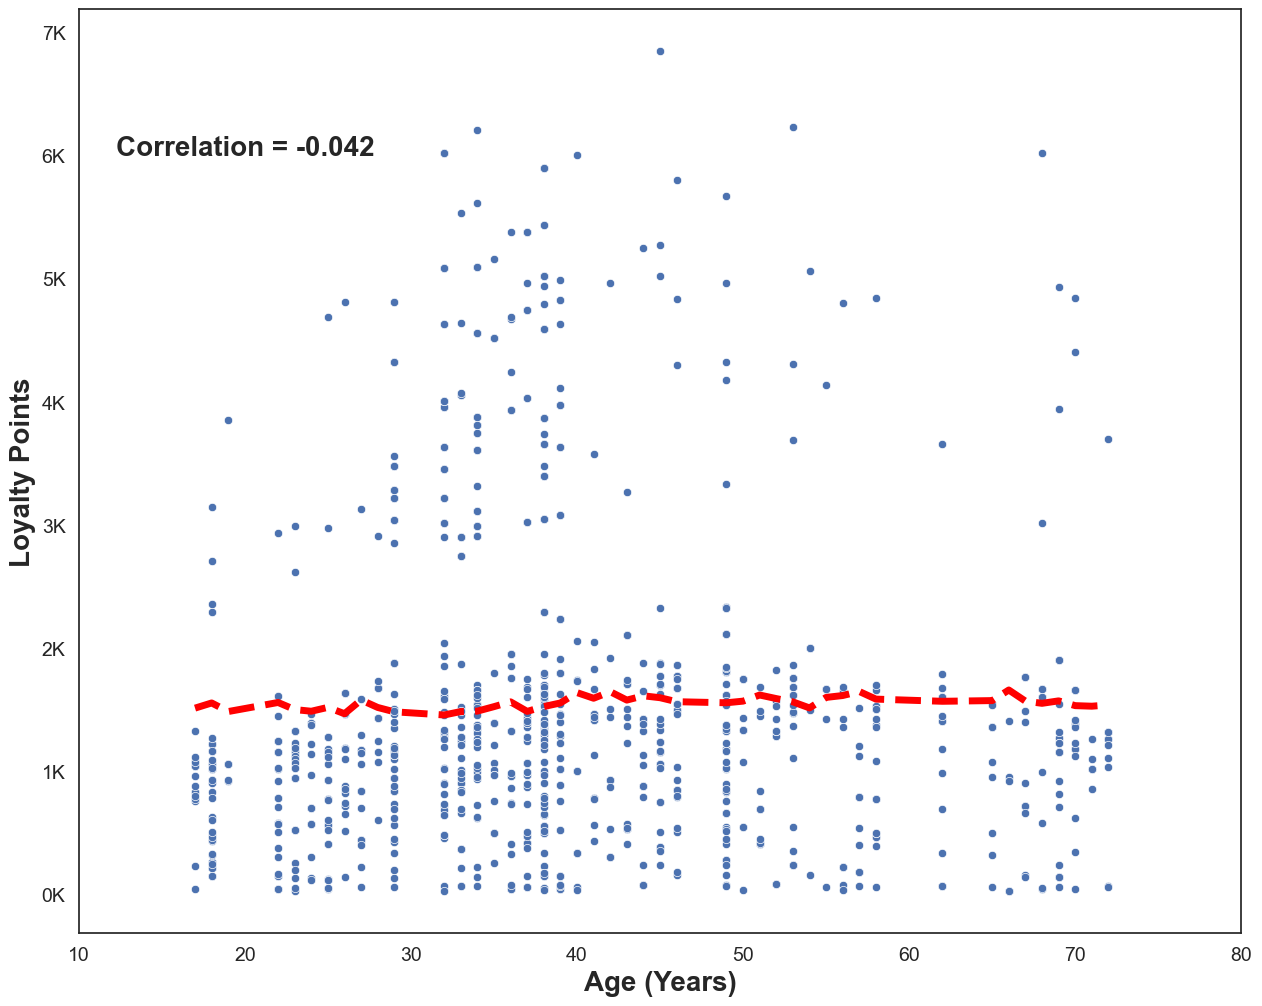

In [29]:
# Plot the graph with a regression line.
# Plot the data points with a scatterplot.
ax1 = sns.scatterplot(x_c, y_c,
                      ci=None)

# Plot the regression line (in red).
ax2 = sns.lineplot(x_c, y_c_pred, 
                   color='red',
                   linewidth=5, linestyle='dashed',
                   ci=None)

# Add comment on correlation.
c = round(x_c.corr(y_c), 3)
ax1.annotate(f'Correlation = {c}', 
             xy=(20,6e3),
             horizontalalignment='center', fontsize=20, weight='bold')

# Adjust x axis.
plt.xlabel("Age (Years)", weight='bold', size=20)
plt.xlim()
# Adjust y axis
plt.ylabel("Loyalty Points", weight='bold', size=20)
plt.ylim()

# Adjust x ticks.
xtick_positions = range(10, 80+10, 10)
plt.xticks(xtick_positions, fontsize=14)
# Adjust y ticks.
ytick_positions = range(0, int(7e3)+int(1e3), int(1e3))
ytick_labels = [f'{round(float(x)/1e3)}K' for x in ytick_positions]
plt.yticks(ytick_positions, ytick_labels, fontsize=14)

# Save figure as .png file for later use.
plt.savefig('cor_loyal_age.png', dpi=300, bbox_inches='tight');  # Semicolon to remove extraneous output.

## 6. Multiple Linear regression

In [30]:
# Independent variables.
x_abc = reviews[['spending_score', 'remuneration', 'age']]

# Dependent variable.
y_abc = reviews['loyalty_points']

In [31]:
# OLS model and summary.
# Create R-style formula 'y ~ x' and pass through OLS methods.
f_abc = 'y_abc ~ x_abc'
test_abc = ols(f_abc, data=reviews).fit()

# Print the regression table.
display(test_abc.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_abc   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     3491.
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:14:37   Log-Likelihood:                -15320.
No. Observations:                2000   AIC:                         3.065e+04
Df Residuals:                    1996   BIC:                         3.067e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2203.0598     52.361    -42.075      0.000   -2305.747   -2100.372
x_abc[0]      34.1832      0.452     75.638      0.000      33.297      35.070
x_abc[1]      34.0084      0.497     68.427      0.000      33.034      34.983
x_abc[2]      11.0607      0.869     12.730      0.000       9.357      12.765
==============================================================================
Omnibus:                       22.644   Durbin-Watson:                   3.453
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.110
Skew:                           0.227   Prob(JB):                     5.82e-06
Kurtosis:                       3.290   Cond. No.                         377.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# Extract the estimated parameters.
print("Parameters:", test_abc.params)  
print()  # Print blank line for clarity.

# Extract the standard errors.
print("Standard errors:", test_abc.bse)  
print()  # Print blank line for clarity.

# Extract the predicted values.
print("Predicted values:", test_abc.predict())

Parameters: Intercept   -2203.059751
x_abc[0]       34.183197
x_abc[1]       34.008385
x_abc[2]       11.060659
dtype: float64

Standard errors: Intercept    52.360900
x_abc[0]      0.451931
x_abc[1]      0.497000
x_abc[2]      0.868845
dtype: float64

Predicted values: [ -252.52008641  1238.47746341 -1308.43606252 ...  4434.8905332
  2066.35892261  1575.56389984]


In [33]:
# Create the linear regression model.
# Set the X coefficient (gradient) and the constant (y-intercept) to generate the regression table.
y_abc_pred = pd.DataFrame(columns=['x_a', 'x_b', 'x_c'])
y_abc_pred['x_a'] = test_abc.params[0] + test_abc.params[1]*x_a
y_abc_pred['x_b'] = test_abc.params[0] + test_abc.params[2]*x_b
y_abc_pred['x_c'] = test_abc.params[0] + test_abc.params[3]*x_c

# View the output.
print("Predicted y values:")
display(y_abc_pred)

Predicted y values:


x_a          x_b          x_c
0     -869.915085 -1784.756610 -2003.967894
1      565.779171 -1784.756610 -1948.664601
2    -1997.960572 -1756.869734 -1959.725260
3      429.046385 -1756.869734 -1926.543284
4     -835.731888 -1728.982858 -1838.058014
...           ...          ...          ...
1995   155.580813   669.288487 -1793.815379
1996 -1929.594179   948.157248 -1727.451427
1997   907.611137   948.157248 -1826.997355
1998 -1656.128606  1143.365381 -1826.997355
1999 -1929.594179   948.157248 -1849.118673

[2000 rows x 3 columns]

In [34]:
# Calculate residuals.
residuals = test_abc.predict() - y_abc

# Show residuals.
print("Calculated residuals:")
display(residuals)

Calculated residuals:


0       -462.520086
1        714.477463
2      -1348.436063
3        589.752871
4       -362.653257
           ...     
1995    -593.826576
1996    1158.231146
1997   -1179.109467
1998    1018.358923
1999    1096.563900
Name: loyalty_points, Length: 2000, dtype: float64

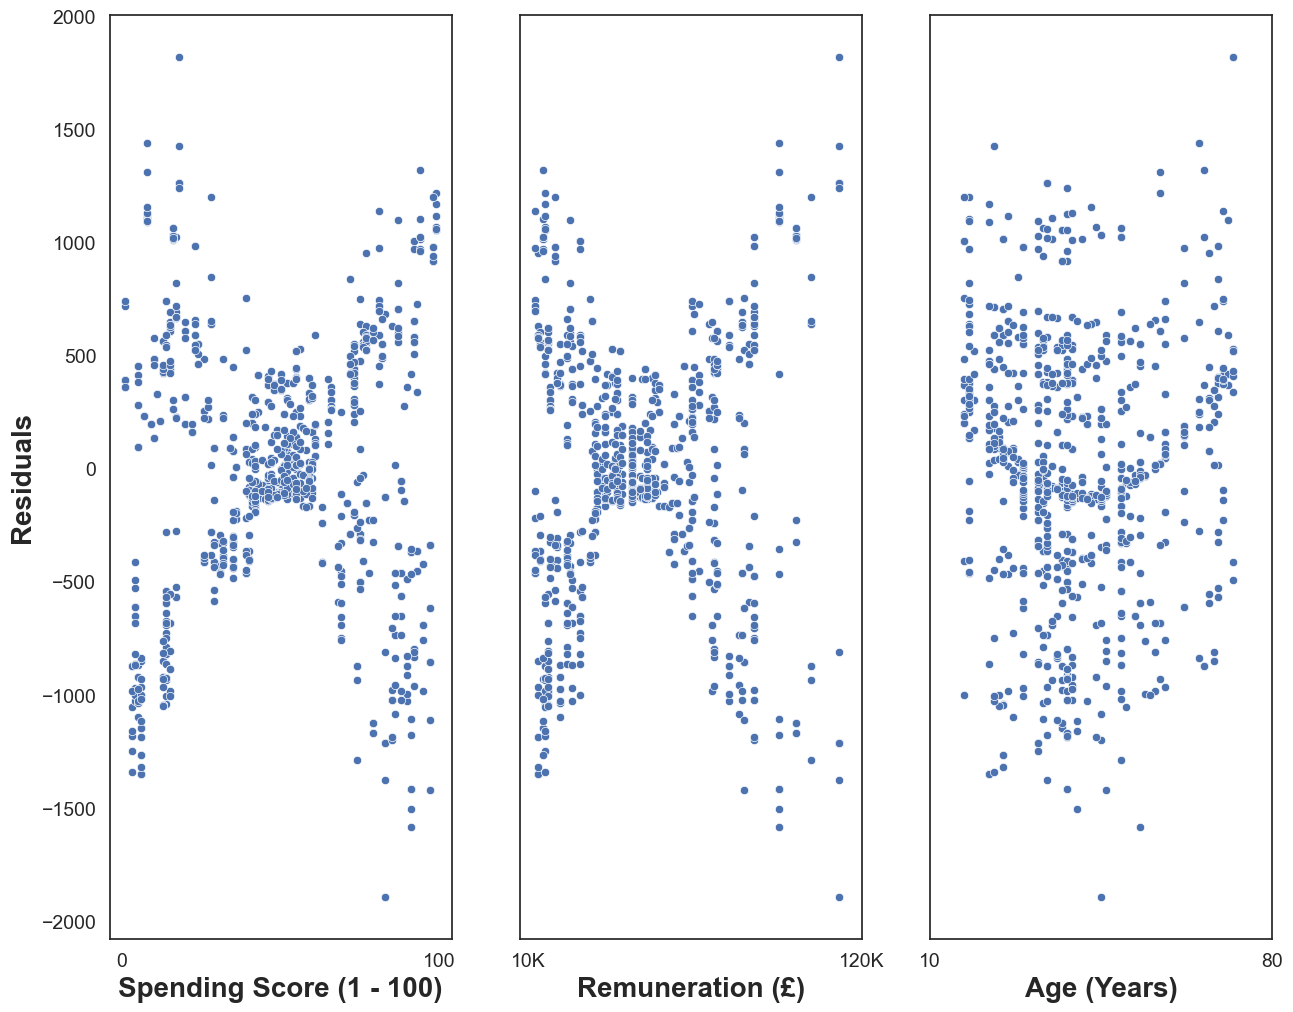

In [35]:
# Plot the residuals=(y-predict - y-observe) versus the x-variables.
# Ideally, there should be no pattern in this plot
plt.subplot(1,3,1)
ax1 = sns.scatterplot(reviews['spending_score'], residuals,
                      ci=None)
plt.xlabel("Spending Score (1 - 100)", weight='bold', size=20)
plt.ylabel("Residuals", weight='bold', size=20)
xtick_positions = [0, 100]
plt.xticks(xtick_positions, fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(1,3,2)
ax2 = sns.scatterplot(reviews['remuneration'], residuals)
plt.xlabel("Remuneration (£)", weight='bold', size=20)
xtick_positions = [10, 120]
xtick_labels = [f'{round(float(x))}K' for x in xtick_positions]
plt.xticks(xtick_positions, xtick_labels, fontsize=14)
plt.ylabel(None)
plt.yticks([])

plt.subplot(1,3,3)
ax3 = sns.scatterplot(reviews['age'], residuals)
plt.xlabel("Age (Years)", weight='bold', size=20)
xtick_positions = [10, 80]
plt.xticks(xtick_positions, fontsize=14)
plt.ylabel(None)
plt.yticks([])

# Save figure as .png file for later use.
plt.savefig('resid_mlr.png', dpi=300, bbox_inches='tight');  # Semicolon to remove extraneous output.

Scattered residuals are a good sign.

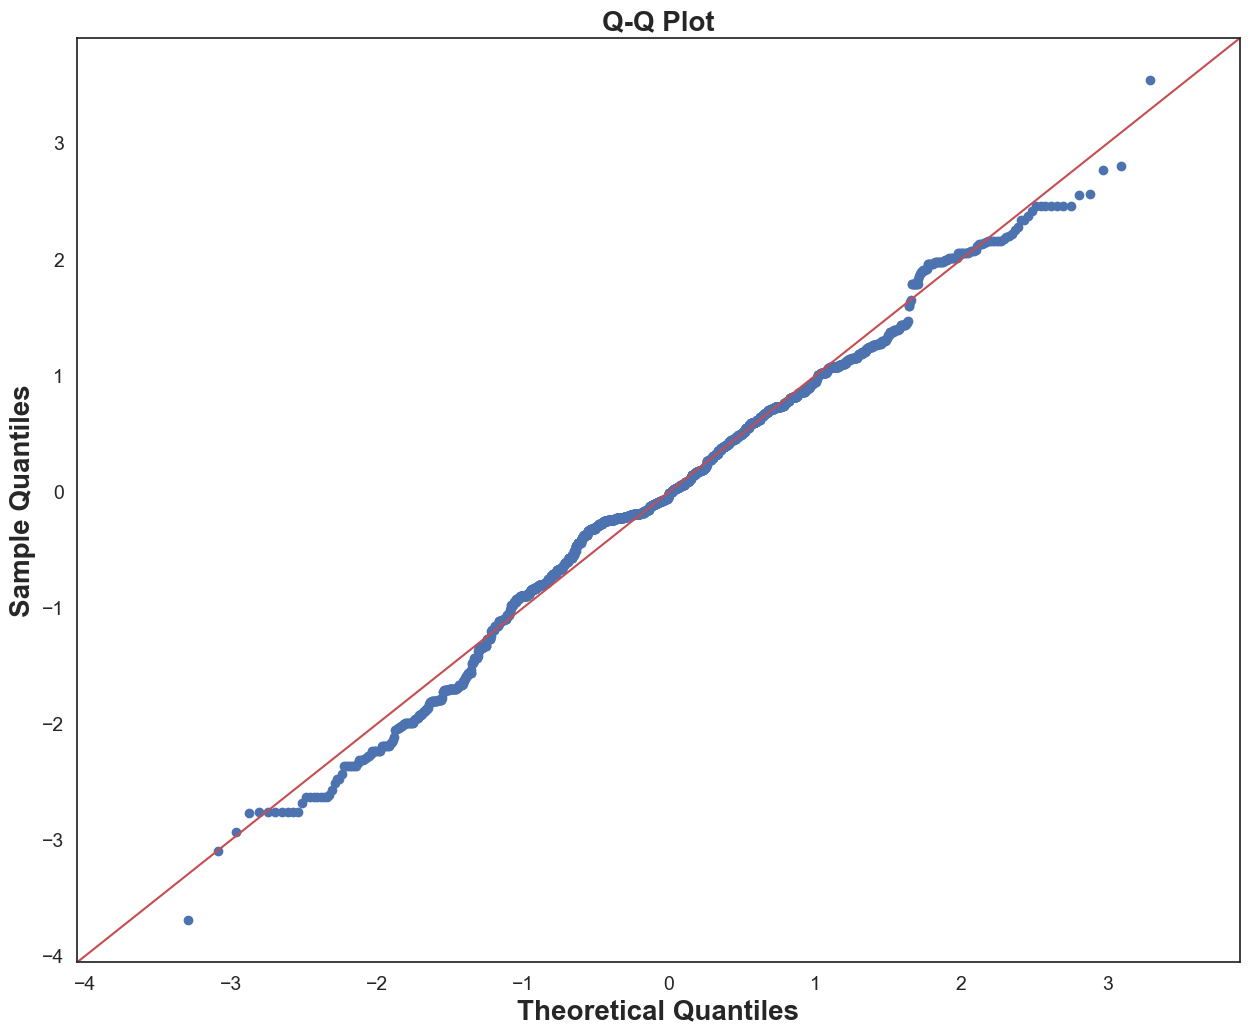

In [36]:
# Plot the quartiles of the residuals versus the quartiles of the N(0,1).
# The fit=True argument first Standardises the observed data (Residuals) before plotting them.
sm.qqplot(residuals, fit=True, line='45')

# Adjust x axis.
plt.xlabel("Theoretical Quantiles", weight='bold', size=20)
plt.xlim()
# Adjust y axis
plt.ylabel("Sample Quantiles", weight='bold', size=20)
plt.ylim()

# Adjust x ticks.
plt.xticks(fontsize=14)
# Adjust y ticks.
plt.yticks(fontsize=14)

plt.title("Q-Q Plot", weight='bold', size=20)

# Save figure as .png file for later use.
plt.savefig('qqplot_mlr_loyalty.png', dpi=300, bbox_inches='tight');  # Semicolon to remove extraneous output.

In [37]:
# Split the data in 'train' (80%) and 'test' (20%) sets.
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_abc, y_abc,
                                                                            test_size=0.20,
                                                                            random_state=42)

In [38]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector.
y_pred = model.predict(sm.add_constant(x_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
display(print_model)  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         loyalty_points   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     2846.
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:14:40   Log-Likelihood:                -12246.
No. Observations:                1600   AIC:                         2.450e+04
Df Residuals:                    1596   BIC:                         2.452e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2197.0105     58.134    -37.792      0.000   -2311.037   -2082.984
spending_score    33.9681      0.505     67.253      0.000      32.977      34.959
remuneration      34.2457      0.552     62.004      0.000      33.162      35.329
age               11.0137      0.974     11.313      0.000       9.104      12.923
==============================================================================
Omnibus:                       14.722   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.856
Skew:                           0.189   Prob(JB):                     0.000360
Kurtosis:                       3.308   Cond. No.                         377.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Adjusted R^2 = 84.2%
- t is high and p is small for all 3 parameters - all are statistically significant
- Significance is shown by coef; descending order of significance: spending_score, remuneration, age

In [39]:
# Specify the model.
mlr = LinearRegression() 

# Fit the model. We can only fit the model with the training data set.
mlr.fit(x_train, y_train)  

LinearRegression()

In [40]:
# Call the predictions for x_abc in the train set.
y_pred_mlr = mlr.predict(x_train)  

# Print the predictions.
print("Prediction for train set: {}".format(y_pred_mlr)) 

Prediction for train set: [1581.73296854  796.88423068 2185.24039458 ... 1789.93373561 1399.81947689
 1437.21562445]


In [41]:
# Call the predictions for x_abc in the test set.
y_pred_mlr = mlr.predict(x_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr))  

Prediction for test set: [-4.25709053e+02  2.99343559e+03  2.60003812e+03  1.22401268e+03
  1.53391529e+03  1.79212254e+03  4.18943142e+02  1.38614741e+03
  1.36427501e+03  3.26123743e+03  1.28766114e+03  1.65894130e+03
  1.69575771e+03  2.33734079e+03  1.27743942e+03  1.46204653e+03
  1.69474080e+03  8.09214691e+02 -2.63922829e+01 -9.61682267e+02
  1.55468086e+03  5.11057805e+01  1.64730047e+03  1.29858491e+03
  1.41546811e+03  1.42269406e+03  3.87919648e+03  1.61275266e+03
  1.63341589e+03  1.84791589e+03  8.88818487e+01  6.70246855e+02
  1.00427573e+03  1.71837726e+03  1.66852576e+03  1.28842071e+03
  8.91492831e+02  2.09899697e+03  1.36106930e+03  1.07872564e+03
  1.02910663e+03  1.57353521e+03  1.40597357e+03  4.23039314e+03
  4.27476021e+03 -3.51451403e+02  1.71837726e+03  1.53391529e+03
  1.84020998e+03  1.77547954e+03  1.36186127e+03  8.42143578e+02
  8.92577110e+02 -4.98080057e+02  1.95151882e+03  1.49956756e+03
  3.88942654e+02  4.07828006e+03  1.54909408e+03  3.16017028e+03


In [42]:
# Print the R-squared value.
print("The R^2 value is:", mlr.score(x_test, y_test)*100, "%")  

The R^2 value is: 82.90723396315805 %


Close to the adjusted R^2 of the training data set: 84.2%

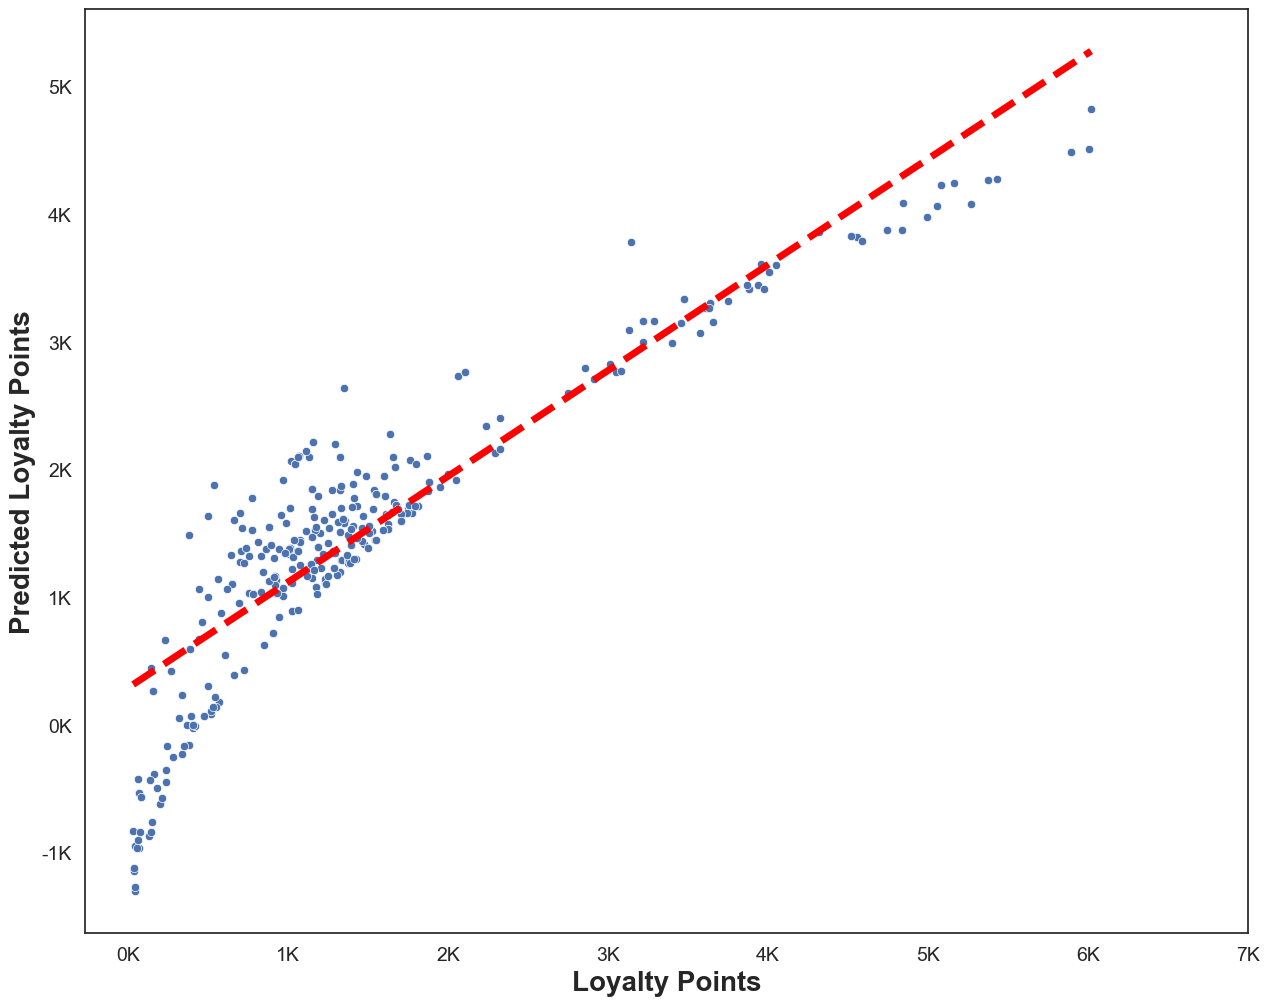

In [43]:
# Plot train vs test set with a regression line.
# Plot the data points with a scatterplot.
ax1 = sns.scatterplot(y_test, y_pred_mlr,
                      ci=None)

# Plot the regression line (in red).
ax2 = sns.lineplot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred_mlr, 1))(np.unique(y_test)), 
                   color='red',
                   linewidth=5, linestyle='dashed',
                   ci=None)

# Add comment on correlation.
# c = round(pd.Series(y_test).corr(pd.Series(y_pred_mlr)), 3)
# ax1.annotate(f'Correlation = {c}', 
#              xy=(30,6e3),
#              horizontalalignment='center', fontsize=20, weight='bold')

# Adjust x axis.
plt.xlabel("Loyalty Points", weight='bold', size=20)
plt.xlim()
# Adjust y axis
plt.ylabel("Predicted Loyalty Points", weight='bold', size=20)
plt.ylim()

# Adjust x ticks.
xtick_positions = range(0, int(7e3)+int(1e3), int(1e3))
xtick_labels = [f'{round(float(x)/1e3)}K' for x in ytick_positions]
plt.xticks(xtick_positions, xtick_labels, fontsize=14)
# Adjust y ticks.
ytick_positions = range(-int(1e3), int(5e3)+int(1e3), int(1e3))
ytick_labels = [f'{round(float(x)/1e3)}K' for x in ytick_positions]
plt.yticks(ytick_positions, ytick_labels, fontsize=14)

# Save figure as .png file for later use.
plt.savefig('cor_loyalpred_loyal.png', dpi=300, bbox_inches='tight');  # Semicolon to remove extraneous output.

The predicted loyalty points start to become negative below a certain threshold, so the predictions may not be accurate in this region. Above this threshold, however, the predictions appear to be reliable.

In [44]:
# Check for multicollinearity.

# Add a constant.
x_temp = sm.add_constant(x_train)  

# Create an empty DataFrame. 
vif = pd.DataFrame() 

# Calculate the 'vif' for each value.
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, 
                                               i) for i in range(x_temp.values.shape[1])]  


# Create the feature columns.
vif['features'] = x_temp.columns  

# Print the values to two decimal points.
print(vif.round(2))  

   VIF Factor        features
0       20.73           const
1        1.06  spending_score
2        1.00    remuneration
3        1.06             age


The variance inflation factor (VIF) looks at the extent to which the variances of the parameter estimates are inflated due to correlations between the independent variables. The VIF ranges from 1 to infinity; therefore, since all 3 VIFs are very close to 1, we can surmise that multicollinearity is negligible here.

In [45]:
# Run the Breusch-Pagan test function on the model residuals and x-variables.
model_bp = sms.het_breuschpagan(model.resid, model.model.exog)

# Print the results of the Breusch-Pagan test.
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
# Print docstring for clarity.
print("Results of Breusch-Pagan test:")
print(dict(zip(terms, model_bp)))

Results of Breusch-Pagan test:
{'LM stat': 39.20687709402344, 'LM Test p-value': 1.56905186811619e-08, 'F-stat': 13.363756098044375, 'F-test p-value': 1.28991282169574e-08}


The LM Test p-value is O(10^-8) << 0.05, indicating the presence of heteroscedasticity.

In [46]:
# Evaluate the model.  

# Call the ‘metrics.mean_squared_error’ function.
print('Mean Square Error (MSE):', metrics.mean_squared_error(y_test, y_pred))

# Call the ‘metrics.mean_absolute_error’ function.  
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))

# Call the ‘metrics.mean_absolute_error’ function.  
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred), "%")

Mean Square Error (MSE): 277188.70233220584
Mean Absolute Error (MAE): 402.23503056376904
Mean Absolute Percentage Error (MAPE): 1.278257724464776 %


An MAPE of 1.3% < 10% is excellent!

## 7. Observations and insights

**Key observations**

> There seems to be notable linear correlations between loyalty points against spending score or remuneration; however, this correlation dimishes with regards to age. The scatter plot of loyalty points against age shows that the number of loyalty points is roughly evenly distributed amongst the various ages, as shown by the roughly flat linear regression line.

> Taking this observation into account, we tried a multiple linear regression (MLR), which indeed confirmed that age is not as significant as the other two variables; however, it is not totally negligible, so we left it in our final MLR. If efficiency ever became a problem, age is the first variable we would remove from the MLR.

> The model displayed a R^2 = 82.9% correlation with an 80-20 training-test split. This is very statistically significant and combined with no multicollinearity and a low MAPE (1.3%), thus implying that we can tentatively make predictions about loyalty points based on spending score, remuneration, and age. We should be cautious about making firm predictions, however, as heteroscedasticity is present, which is not ideal.

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of remuneration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `remuneration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the remuneration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

### 1.1. Prepare your workstation

**Disable auto-scrolling in all cell outputs for cleanness**

In [47]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

**Import all relevant libraries and settings for analysis**

In [48]:
# Import the necessary libraries for intitial analysis.
import numpy as np
import pandas as pd

# Import additional useful libraries.
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

In [49]:
# Import the necessary libraries for data visualisation.
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

In [50]:
# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

# Optional - Get multiple outputs in the same cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

### 1.2. Importing and sense checking the data

In [51]:
# Import and sense-check the turtle_reviews_clean.csv data. Name the DataFrame "reviews".
reviews = pd.read_csv('turtle_reviews_clean.csv')

# View the DataFrame by:
# 1. Checking the shape,
# 2. Checking the data types,
# 3. Checking the metadata,
# 4. Viewing the DataFrame.
print("DataFrame shape:")
display(reviews.shape)
print()  # Print blank line for clarity.
print("DataFrame data types:")
display(reviews.dtypes)
print()  # Print blank line for clarity.
print("DataFrame metadata:")
display(reviews.info())
print()  # Print blank line for clarity.
print("DataFrame preview:")
display(reviews)

DataFrame shape:


(2000, 9)


DataFrame data types:


gender             object
age                 int64
remuneration      float64
spending_score      int64
loyalty_points      int64
education          object
product             int64
review             object
summary            object
dtype: object


DataFrame metadata:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


None


DataFrame preview:


gender  age  remuneration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0         453  When it comes to a DM's screen, the space on t...   
1         466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2         254  Nice art, nice printing.  Why two panels are f...   
3         263  Amazing buy! Bought it as a gift for our new d...   
4         291  As my review of GF9's previous screens these w...   
...       ...                                                ...   
1995      977  The perfect word game for mixed ages (with Mom...   
1996      979  Great game.  Did not think I would like it whe...   
1997     1012  Great game for all.........\nKeeps the mind ni...   
1998     1031                                          fun game!   
1999      453  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 9 columns]

### 1.3. Subset DataFrame with only relevant columns

In [52]:
# Create DataFrame containing remuneration and spending_score columns.
reviews2 = reviews[['remuneration', 'spending_score']]

# View the DataFrame by:
# 1. Checking the shape,
# 2. Checking the data types,
# 3. Checking the metadata,
# 4. Viewing the DataFrame.
print("DataFrame shape:")
display(reviews2.shape)
print()  # Print blank line for clarity.
print("DataFrame data types:")
display(reviews2.dtypes)
print()  # Print blank line for clarity.
print("DataFrame metadata:")
display(reviews2.info())
print()  # Print blank line for clarity.
print("DataFrame preview:")
display(reviews2)

DataFrame shape:


(2000, 2)


DataFrame data types:


remuneration      float64
spending_score      int64
dtype: object


DataFrame metadata:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


None


DataFrame preview:


remuneration  spending_score
0            12.30              39
1            12.30              81
2            13.12               6
3            13.12              77
4            13.94              40
...            ...             ...
1995         84.46              69
1996         92.66               8
1997         92.66              91
1998         98.40              16
1999         92.66               8

[2000 rows x 2 columns]

### 1.4. Reviewing the descriptive statistics.

In [53]:
# Determine the descriptive statistics of data set turtle_reviews.csv.
display(reviews2.describe())

remuneration  spending_score
count   2000.000000     2000.000000
mean      48.079060       50.000000
std       23.123984       26.094702
min       12.300000        1.000000
25%       30.340000       32.000000
50%       47.150000       50.000000
75%       63.960000       73.000000
max      112.340000       99.000000

## 2. Plot

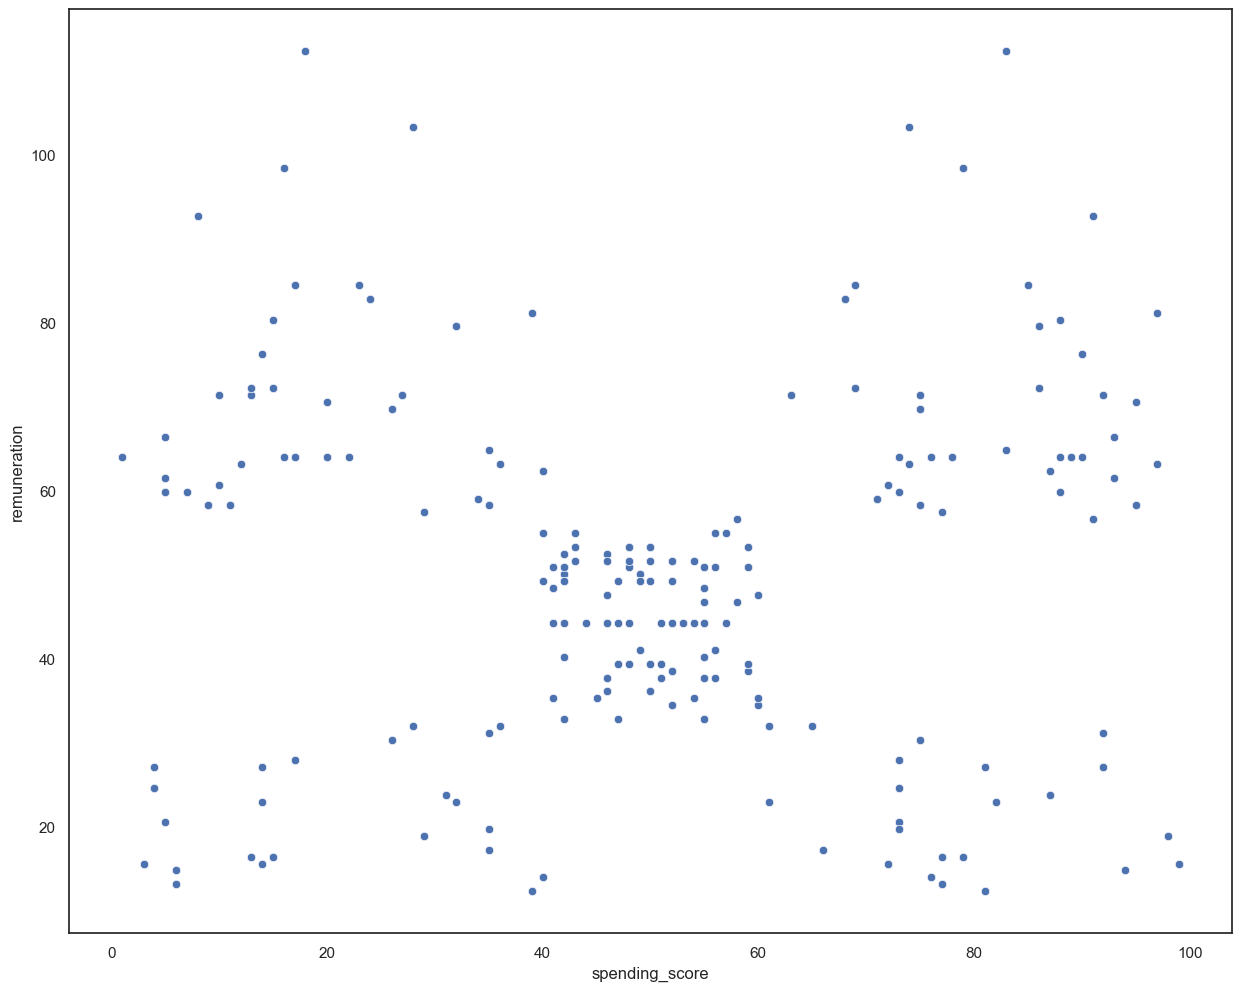

In [54]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='spending_score', y='remuneration',
                data=reviews2,
                ci=None);  # Semicolon to remove extraneous output.

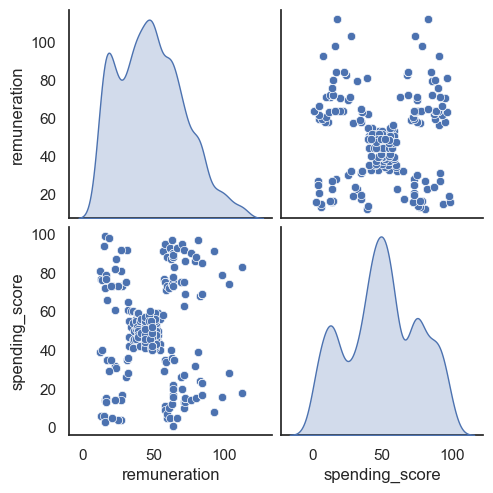

In [55]:
# Create a pairplot with Seaborn.
sns.pairplot(reviews2,
             diag_kind='kde');  # Semicolon to remove extraneous output.

## 3. Elbow and silhoutte methods

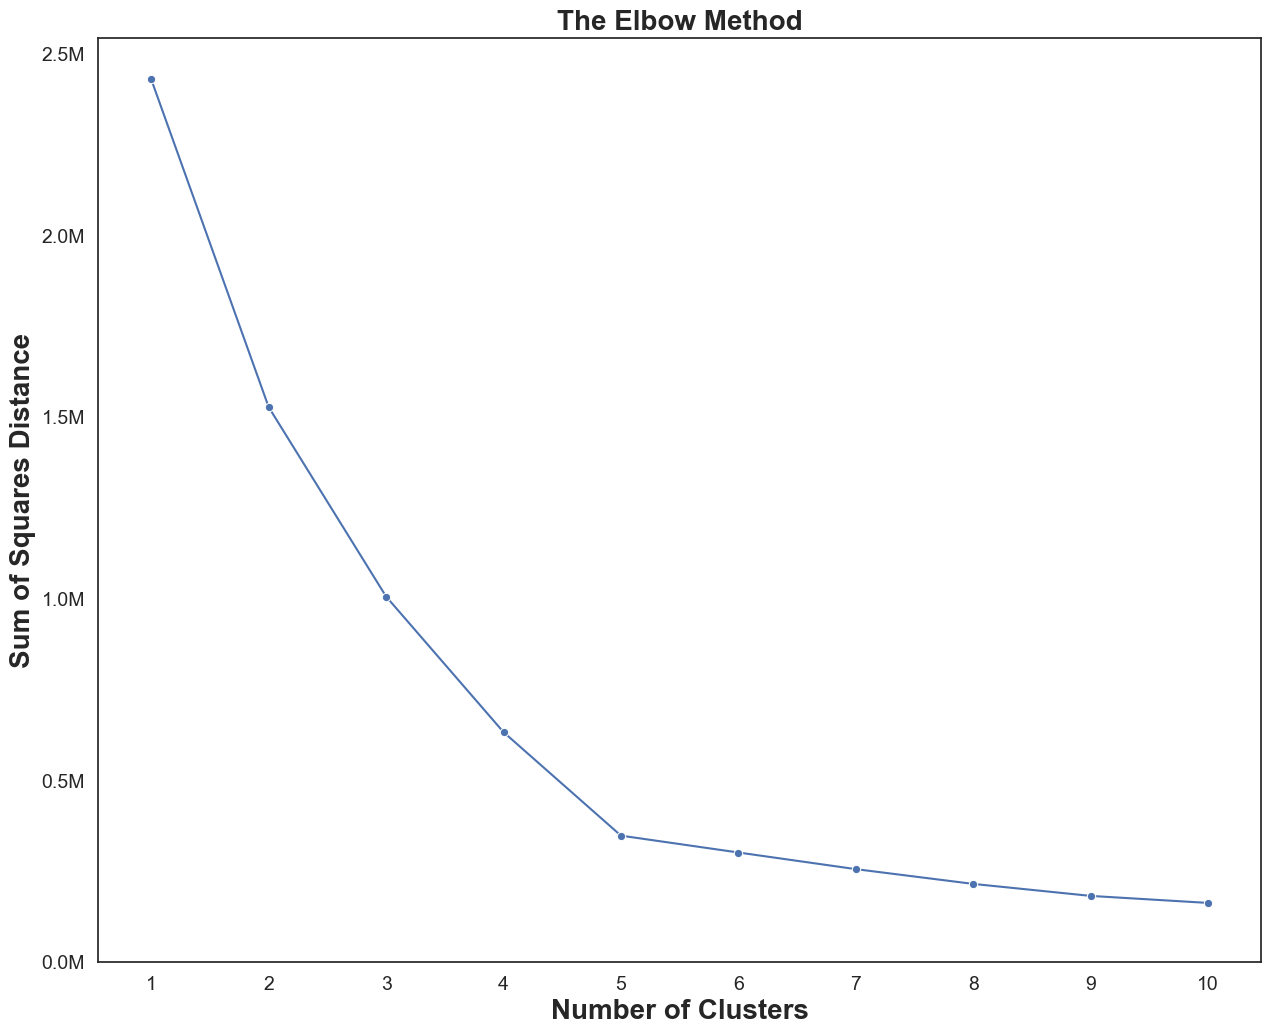

In [56]:
# Determine the number of clusters: Elbow method.
# Elbow chart for us to decide on the number of optimal clusters.
ss = []  # Sum of squares.
kmax = 10  # Maximum number of clusters.

for i in range(1, kmax+1):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(reviews2)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
sns.lineplot(range(1, kmax+1),
             ss,
             marker='o')

# Adjust x axis.
plt.xlabel("Number of Clusters", weight='bold', size=20)
plt.xlim()
# Adjust y axis
plt.ylabel("Sum of Squares Distance", weight='bold', size=20)
plt.ylim()

# Adjust x ticks.
xtick_positions = range(1, kmax+1, 1)
plt.xticks(xtick_positions, fontsize=14)
# Adjust y ticks.
ytick_positions = range(0, int(2.5e6)+int(0.5e6), int(0.5e6))
ytick_labels = [f'{round(float(x)/1e6, 1)}M' for x in ytick_positions]
plt.yticks(ytick_positions, ytick_labels, fontsize=14)

# Insert labels and title.
plt.title("The Elbow Method", weight='bold', size=20)

# Save figure as .png file for later use.
plt.savefig('cluster_elbow.png', dpi=300, bbox_inches='tight');  # Semicolon to remove extraneous output.

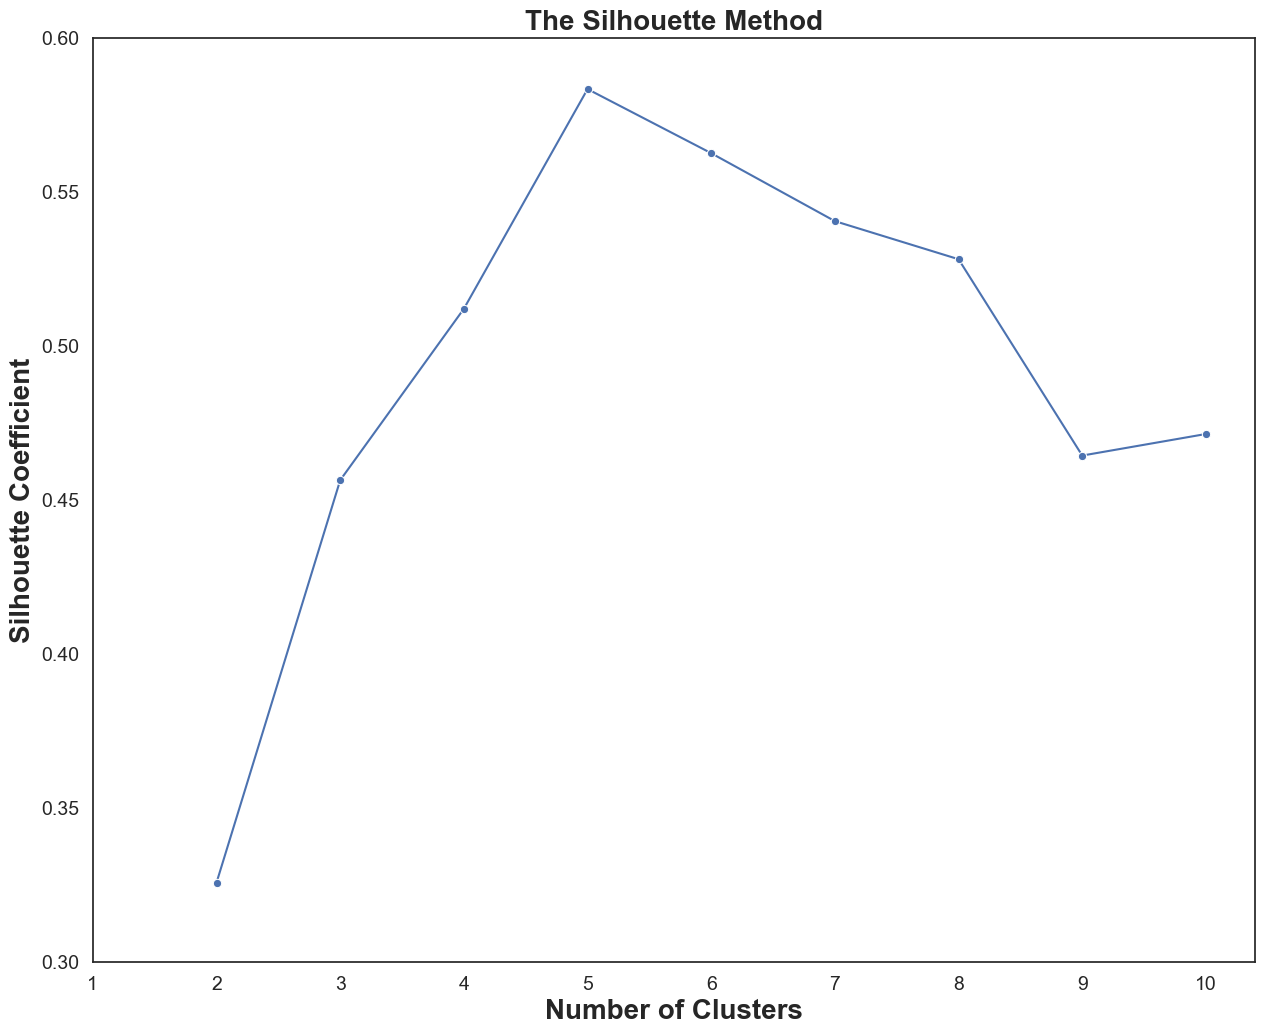

In [57]:
# Determine the number of clusters: Silhouette method.
# Find the range of clusters to be used using silhouette method.
sil = []  # Silhouette coefficient.
kmax = 10  # Maximum number of clusters.

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(reviews2)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(reviews2,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
sns.lineplot(range(2, kmax+1),
             sil,
             marker='o')

# Adjust x axis.
plt.xlabel("Number of Clusters", weight='bold', size=20)
plt.xlim()
# Adjust y axis
plt.ylabel("Silhouette Coefficient", weight='bold', size=20)
plt.ylim()

# Adjust x ticks.
xtick_positions = range(1, kmax+1, 1)
plt.xticks(xtick_positions, fontsize=14)
# Adjust y ticks.
ytick_positions = np.arange(0.3, 0.6+0.05, 0.05)
plt.yticks(ytick_positions, fontsize=14)

# Insert labels and title.
plt.title("The Silhouette Method", weight='bold', size=20)

# Save figure as .png file for later use.
plt.savefig('cluster_sil.png', dpi=300, bbox_inches='tight');  # Semicolon to remove extraneous output.

## 4. Evaluate k-means model at different values of *k*

### 4.1. k = 4 (Four Clusters):

**Evaluate and fit the model**

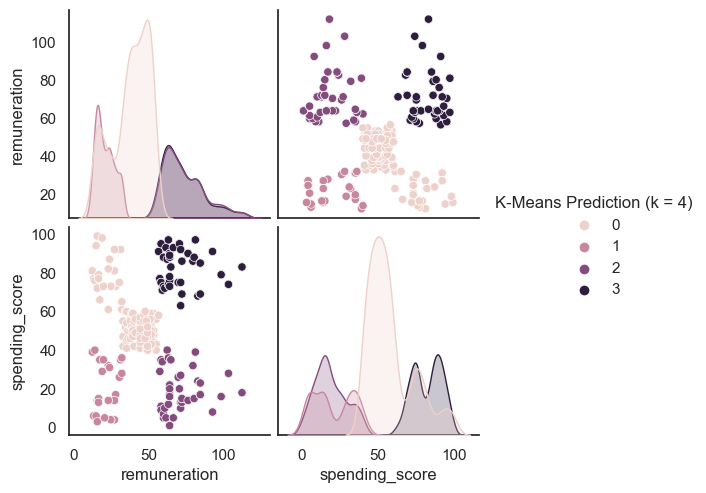

In [58]:
# Use four clusters.
kmeans = KMeans(n_clusters = 4, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(reviews2)

clusters = kmeans.labels_

reviews2['K-Means Prediction (k = 4)'] = clusters

# Plot the predicted.
sns.pairplot(reviews2,
             vars=['remuneration', 'spending_score'],
             hue='K-Means Prediction (k = 4)',
             diag_kind= 'kde');  # Semicolon to remove extraneous output.

**Visualise the clusters**

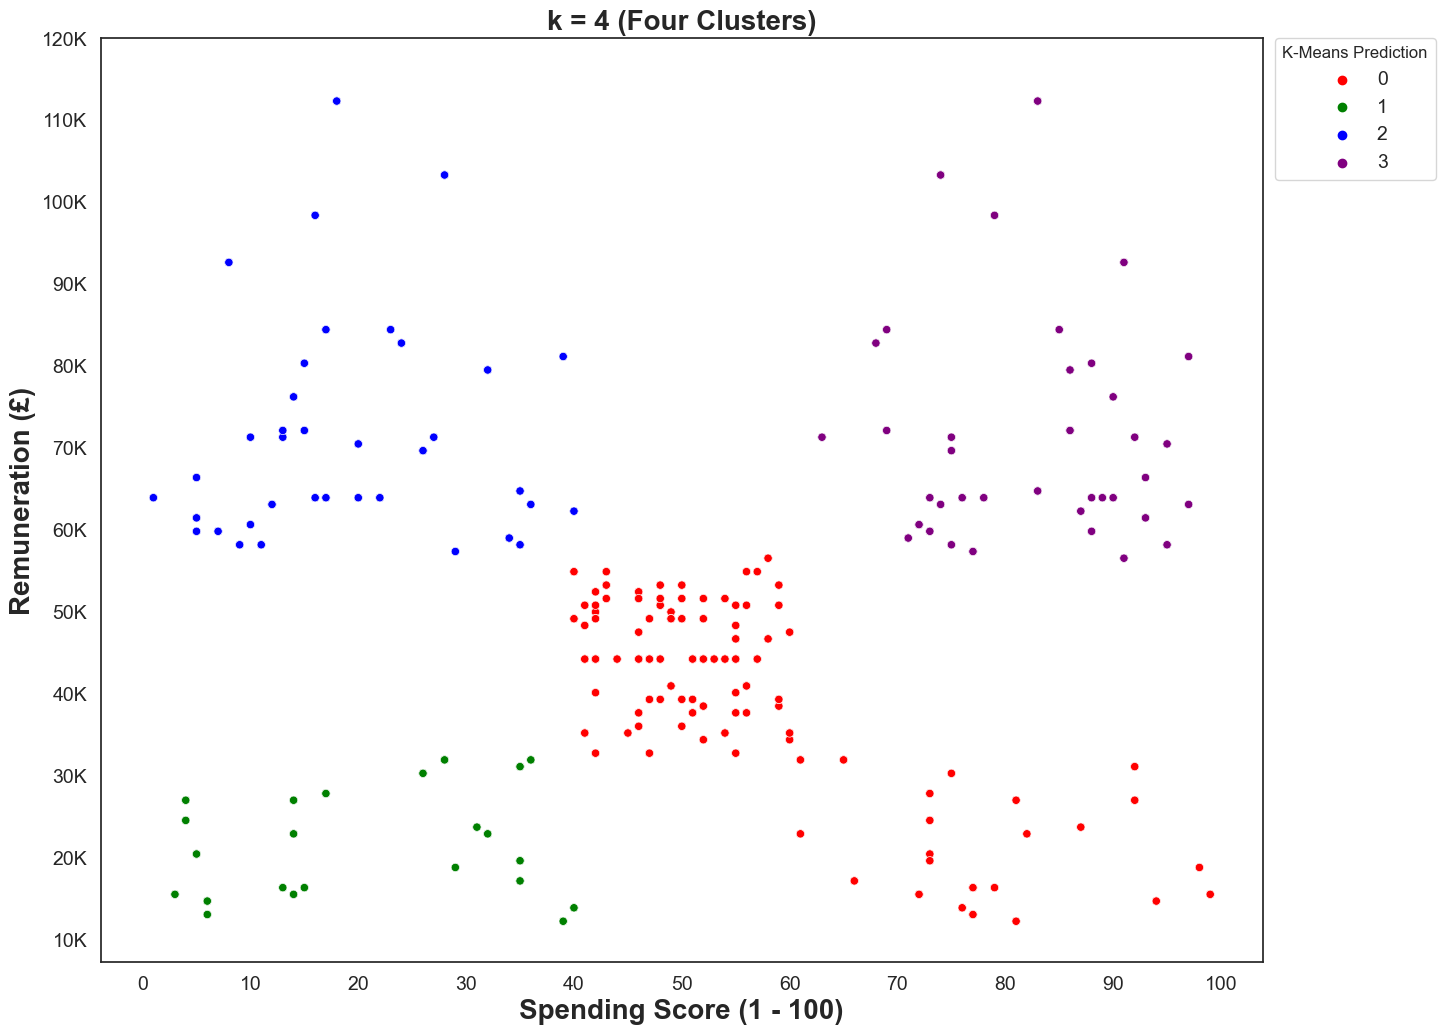

In [59]:
# Visualising the clusters.
# Create a scatterplot with Seaborn.
sns.scatterplot(x='spending_score', y='remuneration',
                data=reviews2,
                hue='K-Means Prediction (k = 4)',
                palette=['red', 'green', 'blue', 'purple'],
                ci=None)

# Format legend.
plt.legend(title='K-Means Prediction', bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0, fontsize=14);

# Adjust x axis.
plt.xlabel("Spending Score (1 - 100)", weight='bold', size=20)
plt.xlim()
# Adjust y axis
plt.ylabel("Remuneration (£)", weight='bold', size=20)
plt.ylim()

# Adjust x ticks.
xtick_positions = range(0, 100+10, 10)
plt.xticks(xtick_positions, fontsize=14)
# Adjust y ticks.
ytick_positions = range(10, 120+10, 10)
ytick_labels = [f'{round(float(x))}K' for x in ytick_positions]
plt.yticks(ytick_positions, ytick_labels, fontsize=14)

# Insert labels and title.
plt.title("k = 4 (Four Clusters)", weight='bold', size=20);  # Semicolon to remove extraneous output.

### 4.2. k = 5 (Five Clusters):

**Evaluate and fit the model**

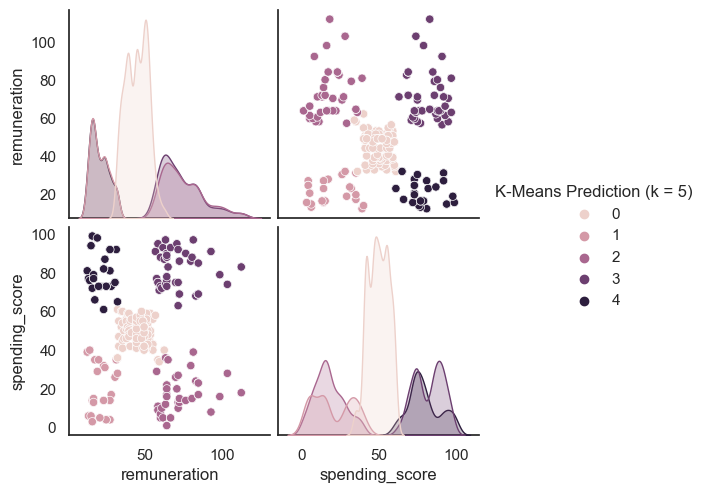

In [60]:
# Use five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(reviews2)

clusters = kmeans.labels_

reviews2['K-Means Prediction (k = 5)'] = clusters

# Plot the predicted.
sns.pairplot(reviews2,
             vars=['remuneration', 'spending_score'],
             hue='K-Means Prediction (k = 5)',
             diag_kind= 'kde');  # Semicolon to remove extraneous output.

**Visualise the clusters**

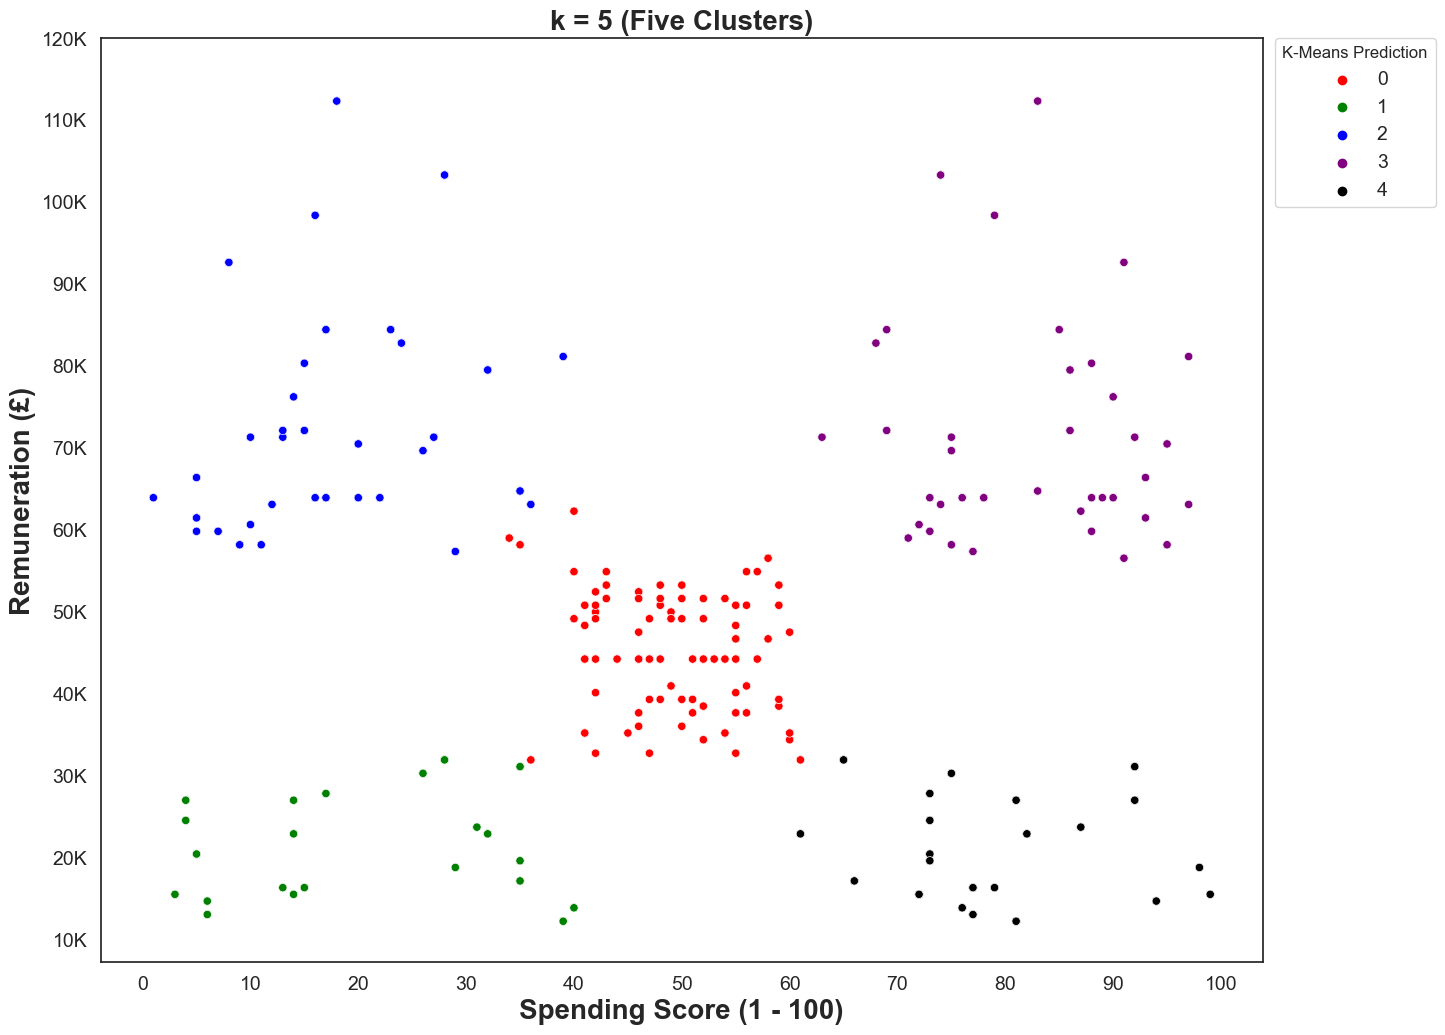

In [61]:
# Visualising the clusters.
# Create a scatterplot with Seaborn.
sns.scatterplot(x='spending_score', y='remuneration',
                data=reviews2,
                hue='K-Means Prediction (k = 5)',
                palette=['red', 'green', 'blue', 'purple', 'black'],
                ci=None)

# Format legend.
plt.legend(title='K-Means Prediction', bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0, fontsize=14);

# Adjust x axis.
plt.xlabel("Spending Score (1 - 100)", weight='bold', size=20)
plt.xlim()
# Adjust y axis
plt.ylabel("Remuneration (£)", weight='bold', size=20)
plt.ylim()

# Adjust x ticks.
xtick_positions = range(0, 100+10, 10)
plt.xticks(xtick_positions, fontsize=14)
# Adjust y ticks.
ytick_positions = range(10, 120+10, 10)
ytick_labels = [f'{round(float(x))}K' for x in ytick_positions]
plt.yticks(ytick_positions, ytick_labels, fontsize=14)

# Insert labels and title.
plt.title("k = 5 (Five Clusters)", weight='bold', size=20);  # Semicolon to remove extraneous output.

### 4.3. k = 6 (Six Clusters):

**Evaluate and fit the model**

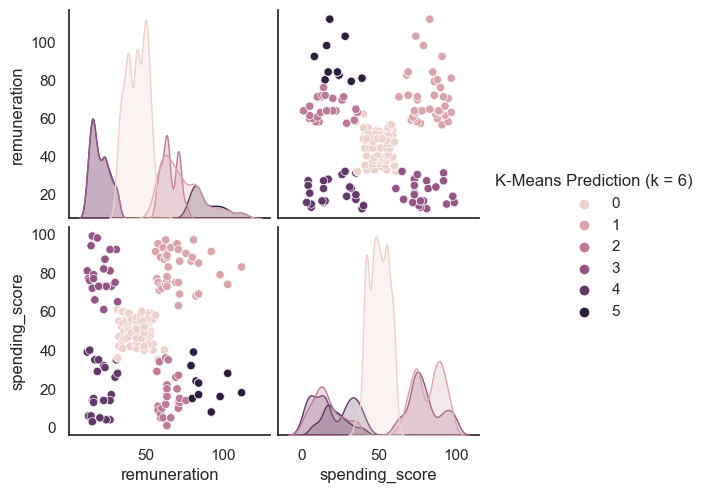

In [62]:
# Use six clusters.
kmeans = KMeans(n_clusters = 6, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(reviews2)

clusters = kmeans.labels_

reviews2['K-Means Prediction (k = 6)'] = clusters

# Plot the predicted.
sns.pairplot(reviews2,
             vars=['remuneration', 'spending_score'],
             hue='K-Means Prediction (k = 6)',
             diag_kind= 'kde');  # Semicolon to remove extraneous output.

**Visualise the clusters**

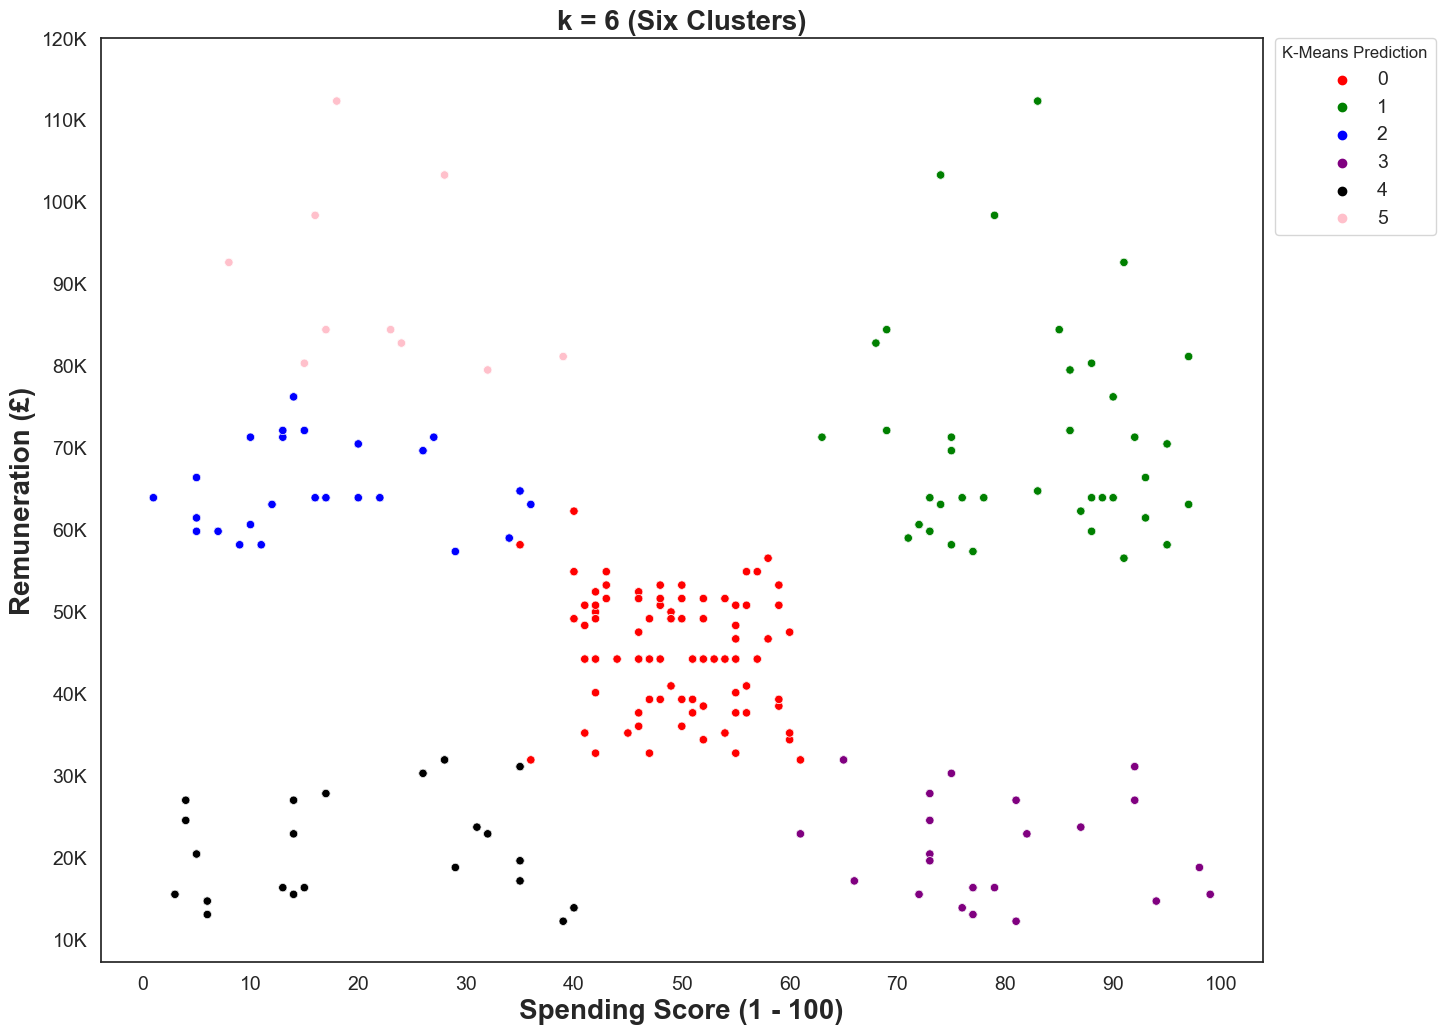

In [63]:
# Visualising the clusters.
# Create a scatterplot with Seaborn.
sns.scatterplot(x='spending_score', y='remuneration',
                data=reviews2,
                hue='K-Means Prediction (k = 6)',
                palette=['red', 'green', 'blue', 'purple', 'black', 'pink'],
                ci=None)

# Format legend.
plt.legend(title='K-Means Prediction', bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0, fontsize=14);

# Adjust x axis.
plt.xlabel("Spending Score (1 - 100)", weight='bold', size=20)
plt.xlim()
# Adjust y axis
plt.ylabel("Remuneration (£)", weight='bold', size=20)
plt.ylim()

# Adjust x ticks.
xtick_positions = range(0, 100+10, 10)
plt.xticks(xtick_positions, fontsize=14)
# Adjust y ticks.
ytick_positions = range(10, 120+10, 10)
ytick_labels = [f'{round(float(x))}K' for x in ytick_positions]
plt.yticks(ytick_positions, ytick_labels, fontsize=14)

# Insert labels and title.
plt.title("k = 6 (Six Clusters)", weight='bold', size=20);  # Semicolon to remove extraneous output.

## 5. Fit final model and justify your choice

**Compare different numbers of clusters:**

In [64]:
# Check the number of observations per predicted class for differing k.
print("K-Means Prediction for Four Clusters (k = 4):")
display(reviews2['K-Means Prediction (k = 4)'].value_counts())
print()  # Print blank line for clarity.
print("K-Means Prediction for Five Clusters (k = 5):")
display(reviews2['K-Means Prediction (k = 5)'].value_counts())
print()  # Print blank line for clarity.
print("K-Means Prediction for Six Clusters (k = 6):")
display(reviews2['K-Means Prediction (k = 6)'].value_counts())

K-Means Prediction for Four Clusters (k = 4):


0    1013
3     356
2     351
1     280
Name: K-Means Prediction (k = 4), dtype: int64


K-Means Prediction for Five Clusters (k = 5):


0    774
3    356
2    330
1    271
4    269
Name: K-Means Prediction (k = 5), dtype: int64


K-Means Prediction for Six Clusters (k = 6):


0    767
1    356
4    271
3    269
2    214
5    123
Name: K-Means Prediction (k = 6), dtype: int64

In [65]:
# View the K-Means predicted.
display(reviews2)

remuneration  spending_score  K-Means Prediction (k = 4)  \
0            12.30              39                           1   
1            12.30              81                           0   
2            13.12               6                           1   
3            13.12              77                           0   
4            13.94              40                           1   
...            ...             ...                         ...   
1995         84.46              69                           3   
1996         92.66               8                           2   
1997         92.66              91                           3   
1998         98.40              16                           2   
1999         92.66               8                           2   

      K-Means Prediction (k = 5)  K-Means Prediction (k = 6)  
0                              1                           4  
1                              4                           3  
2                              1                           4  
3                              4                           3  
4                              1                           4  
...                          ...                         ...  
1995                           3                           1  
1996                           2                           5  
1997                           3                           1  
1998                           2                           5  
1999                           2                           5  

[2000 rows x 5 columns]

**Justification for k = 5 (Five Clusters):**

> The Elbow Method produces a graph that levels off at roughly 5, and the Silhouette Method produces a graph with a _very_ clear peak at 5 also. This means that k = 5 (five clusters) is a sensible choice for number of clusters. In order to test this thoroughly, we tested different k values around k = 5, and surmise that k = 5 appears to provide the most even distribution of different classes, and visually, the separation of the data points into 5 clusters is appealing too.

**Evaluate and fit the model**

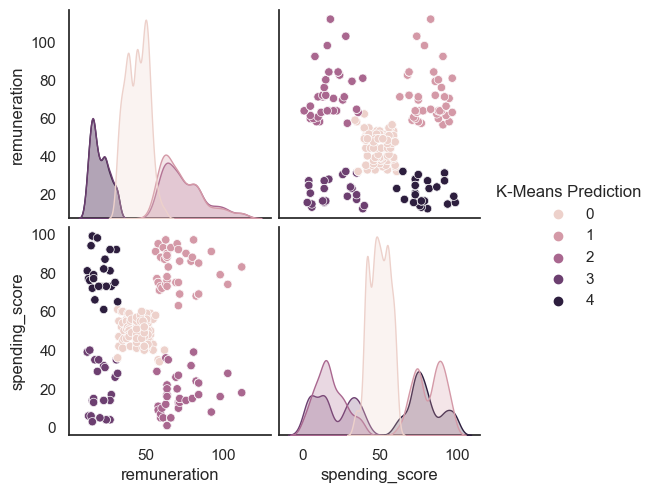

In [66]:
# Use five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(reviews2)

clusters = kmeans.labels_

reviews2['K-Means Prediction'] = clusters

# Plot the predicted.
sns.pairplot(reviews2,
             vars=['remuneration', 'spending_score'],
             hue='K-Means Prediction',
             diag_kind= 'kde');  # Semicolon to remove extraneous output.

**Visualise the clusters**

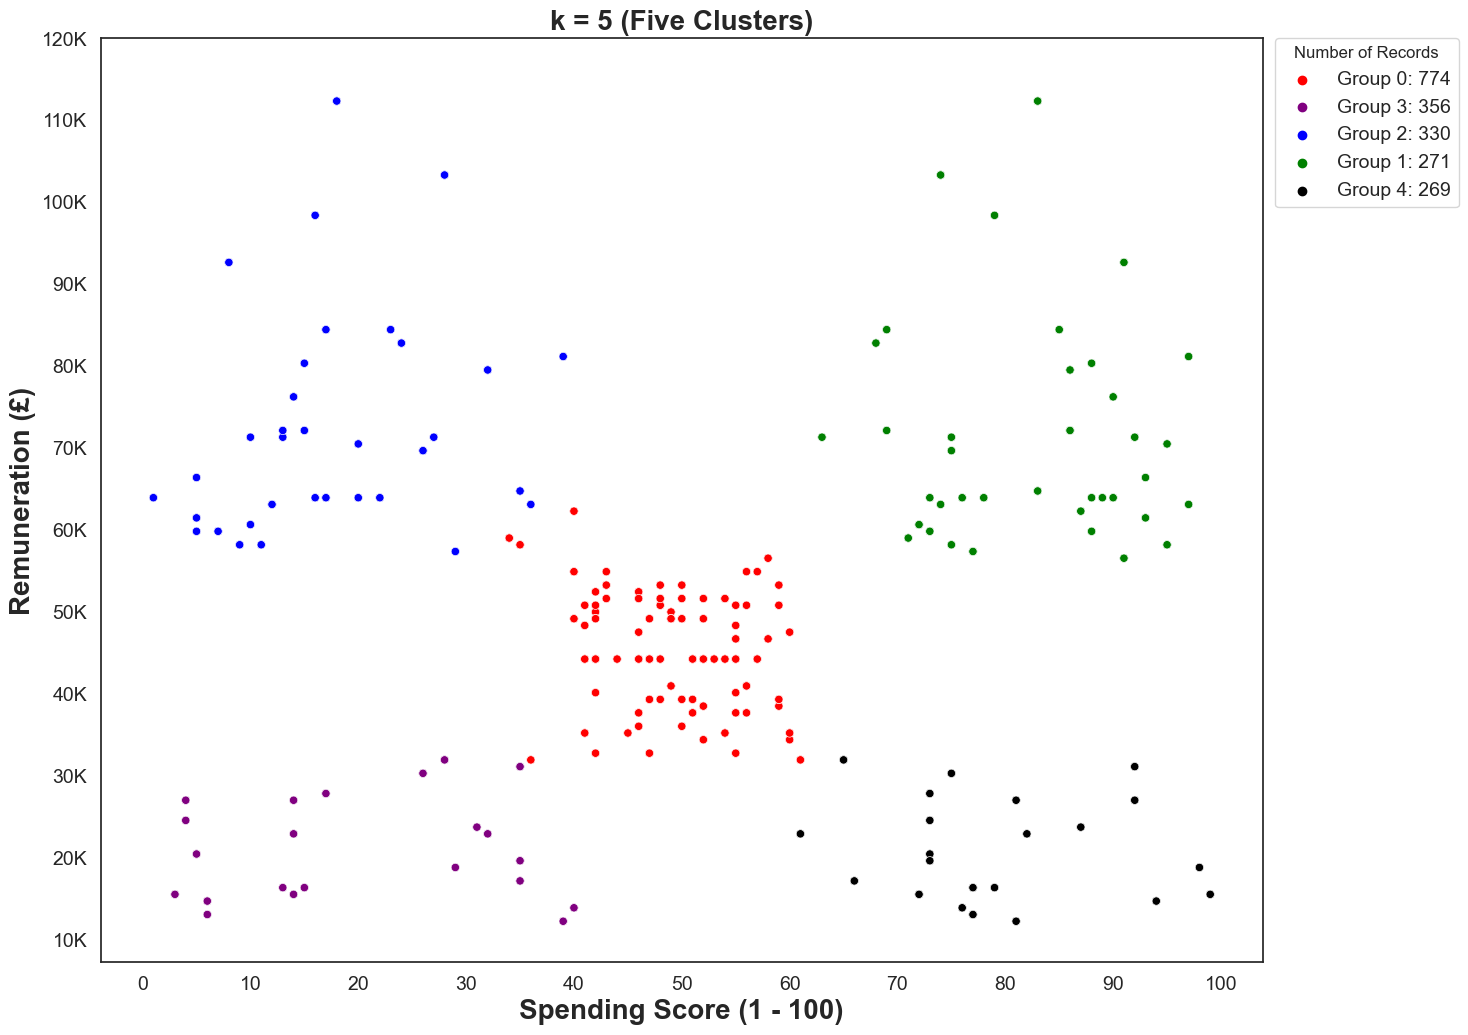

In [67]:
# Visualising the clusters.
# Create a scatterplot with Seaborn.
ax1 = sns.scatterplot(x='spending_score', y='remuneration',
                data=reviews2,
                hue='K-Means Prediction',
                palette=['red', 'green', 'blue', 'purple', 'black'],
                ci=None)

# Format legend.
group_count = reviews2['K-Means Prediction (k = 5)'].value_counts()
labels = ['Group %s: %s'%(group_count.index[x], group_count.values[x]) for x in range(5)]
h, l = ax1.get_legend_handles_labels()
l = labels
plt.legend([h[0:5][x] for x in group_count.index], l, title='Number of Records', bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0, fontsize=14);

# Adjust x axis.
plt.xlabel("Spending Score (1 - 100)", weight='bold', size=20)
plt.xlim()
# Adjust y axis
plt.ylabel("Remuneration (£)", weight='bold', size=20)
plt.ylim()

# Adjust x ticks.
xtick_positions = range(0, 100+10, 10)
plt.xticks(xtick_positions, fontsize=14)
# Adjust y ticks.
ytick_positions = range(10, 120+10, 10)
ytick_labels = [f'{round(float(x))}K' for x in ytick_positions]
plt.yticks(ytick_positions, ytick_labels, fontsize=14)

# Insert labels and title.
plt.title("k = 5 (Five Clusters)", weight='bold', size=20)

# Save figure as .png file for later use.
plt.savefig('cluster_remun_spend.png', dpi=300, bbox_inches='tight');  # Semicolon to remove extraneous output.

## 6. Discuss: Insights and observations

**Key Observations:**

> The elbow method and silouhette method distinctly showed K=5 to be the best fit for number of clusters. The clusters can be roughly described as follows:
> - Cluster 3 - Low earners + Low spenders
> - Cluster 4 - Low earners + High spenders
> - Cluster 0 - Middle earners + Middle spenders
> - Cluster 2 - High earners + Low spenders
> - Cluster 1 - High earners + High spenders

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

### 1.1. Prepare your workstation

**Disable auto-scrolling in all cell outputs for cleanness**

In [68]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

**Import all relevant libraries and settings for analysis**

In [69]:
# Import the necessary libraries for intitial analysis.
import numpy as np
import pandas as pd
import nltk 
import os

# Import additional useful libraries.
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm
import itertools  # Has tools that are faster than looping manually.
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

# Import counter.
from collections import Counter

In [70]:
# Download relevant NLTK additional data.
# nltk.download('punkt')  # Tokenisation model.
# nltk.download('stopwords')  # Stopwords e.g. "a", "the" etc.
# nltk.download('wordnet')  # Stemming model.
# nltk.download('omw-1.4')  # Lemma corpus.

In [71]:
# Import the necessary libraries for data visualisation.
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

In [72]:
# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

# Optional - Get multiple outputs in the same cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

### 1.2. Importing and sense checking the data

In [73]:
# Import and sense-check the turtle_reviews_clean.csv data. Name the DataFrame "reviews".
reviews = pd.read_csv('turtle_reviews_clean.csv')

# View the DataFrame by:
# 1. Checking the shape,
# 2. Checking the data types,
# 3. Checking the metadata,
# 4. Viewing the DataFrame.
print("DataFrame shape:")
display(reviews.shape)
print()  # Print blank line for clarity.
print("DataFrame data types:")
display(reviews.dtypes)
print()  # Print blank line for clarity.
print("DataFrame metadata:")
display(reviews.info())
print()  # Print blank line for clarity.
print("DataFrame preview:")
display(reviews)

DataFrame shape:


(2000, 9)


DataFrame data types:


gender             object
age                 int64
remuneration      float64
spending_score      int64
loyalty_points      int64
education          object
product             int64
review             object
summary            object
dtype: object


DataFrame metadata:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


None


DataFrame preview:


gender  age  remuneration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0         453  When it comes to a DM's screen, the space on t...   
1         466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2         254  Nice art, nice printing.  Why two panels are f...   
3         263  Amazing buy! Bought it as a gift for our new d...   
4         291  As my review of GF9's previous screens these w...   
...       ...                                                ...   
1995      977  The perfect word game for mixed ages (with Mom...   
1996      979  Great game.  Did not think I would like it whe...   
1997     1012  Great game for all.........\nKeeps the mind ni...   
1998     1031                                          fun game!   
1999      453  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 9 columns]

### 1.3. Subset DataFrame with only relevant columns

In [74]:
# Create DataFrame containing remuneration and spending_score columns.
reviews3 = reviews[['review', 'summary']]

# View the DataFrame by:
# 1. Checking the shape,
# 2. Checking the data types,
# 3. Checking the metadata,
# 4. Viewing the DataFrame.
print("DataFrame shape:")
display(reviews3.shape)
print()  # Print blank line for clarity.
print("DataFrame data types:")
display(reviews3.dtypes)
print()  # Print blank line for clarity.
print("DataFrame metadata:")
display(reviews3.info())
print()  # Print blank line for clarity.
print("DataFrame preview:")
display(reviews3)

DataFrame shape:


(2000, 2)


DataFrame data types:


review     object
summary    object
dtype: object


DataFrame metadata:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


None


DataFrame preview:


review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 2 columns]

### 1.4. Reviewing the descriptive statistics.

In [75]:
# Determine the descriptive statistics of data set turtle_reviews.csv.
display(reviews3.describe())

review     summary
count      2000        2000
unique     1980        1432
top     love it  Five Stars
freq          5         378

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [76]:
# Review: Change all to lower case and join with a space.
reviews3['review'] = reviews3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
print("Lower-case reviews:")
display(reviews3['review'].head())

Lower-case reviews:


0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [77]:
# Summary: Change all to lower case and join with a space.
reviews3['summary'] = reviews3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
print("Lower-case summaries:")
display(reviews3['summary'].head())

Lower-case summaries:


0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [78]:
# Replace all the punctuations in review column.
reviews3['review'] = reviews3['review'].str.replace('[^\w\s]','')

# View output.
print("Reviews without punctuation:")
display(reviews3['review'].head())

Reviews without punctuation:


0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [79]:
# Replace all the puncuations in summary column.
reviews3['summary'] = reviews3['summary'].str.replace('[^\w\s]','')

# View output.
print("Summaries without punctuation:")
display(reviews3['summary'].head())

Summaries without punctuation:


0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [80]:
# Check for duplicates in both columns.
review_dupe = reviews3['review'].duplicated().sum()
summary_dupe = reviews3['summary'].duplicated().sum()

print("Number of duplicates in review column:", review_dupe)
print()  # Print blank line for clarity.
print("Number of duplicates in summary column:", summary_dupe)

Number of duplicates in review column: 50

Number of duplicates in summary column: 649


In [81]:
# Drop duplicates in both columns.
reviews3.drop_duplicates(subset=['review'], inplace=True)
reviews3.drop_duplicates(subset=['summary'], inplace=True)

# Double check for duplicates in both columns.
review_dupe = reviews3['review'].duplicated().sum()
summary_dupe = reviews3['summary'].duplicated().sum()

print("Number of duplicates in review column:", review_dupe)
print()  # Print blank line for clarity.
print("Number of duplicates in summary column:", summary_dupe)

# Reset index.
reviews3.reset_index(drop=True, inplace=True)

# View DataFrame.
display(reviews3.head())

# Review new descriptive statistics.
display(reviews3.describe())

Number of duplicates in review column: 0

Number of duplicates in summary column: 0


review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

review  \
count                                                1349   
unique                                               1349   
top     when it comes to a dms screen the space on the...   
freq                                                    1   

                                                  summary  
count                                                1349  
unique                                               1349  
top     the fact that 50 of this space is wasted on ar...  
freq                                                    1

## 3. Tokenise and create wordclouds

In [82]:
# Create new DataFrame (copy DataFrame).
reviews3_tokens = reviews3.copy()

# View DataFrame.
display(reviews3_tokens.head())

review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

In [83]:
# Apply tokenisation to both columns.
reviews3_tokens['review'] = reviews3_tokens['review'].apply(word_tokenize)  # Apply has no inplace argument.
reviews3_tokens['summary'] = reviews3_tokens['summary'].apply(word_tokenize)  # Apply has no inplace argument.

# View DataFrame.
display(reviews3_tokens.head())

review  \
0  [when, it, comes, to, a, dms, screen, the, spa...   
1  [an, open, letter, to, galeforce9, your, unpai...   
2  [nice, art, nice, printing, why, two, panels, ...   
3  [amazing, buy, bought, it, as, a, gift, for, o...   
4  [as, my, review, of, gf9s, previous, screens, ...   

                                             summary  
0  [the, fact, that, 50, of, this, space, is, was...  
1  [another, worthless, dungeon, masters, screen,...  
2               [pretty, but, also, pretty, useless]  
3                                      [five, stars]  
4                                      [money, trap]

**Word cloud of reviews:**

In [84]:
# Review: Prepare text for word cloud.
review_all_comments = ' '.join(reviews3['review'])
# join is much more efficient than looping manually, 
# and also does not require pre-tokenisation, saving even more time.

# Preview new objects (first 1000 characters).
print("All comments from the review column:")
print(review_all_comments[0:1000], '...')

All comments from the review column:
when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and

In [85]:
# Review: Create a word cloud.
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
review_word_cloud = WordCloud(width = 1600, height = 900, 
                              background_color ='white',
                              colormap = 'plasma', 
                              stopwords = 'none',
                              min_font_size = 10).generate(review_all_comments)

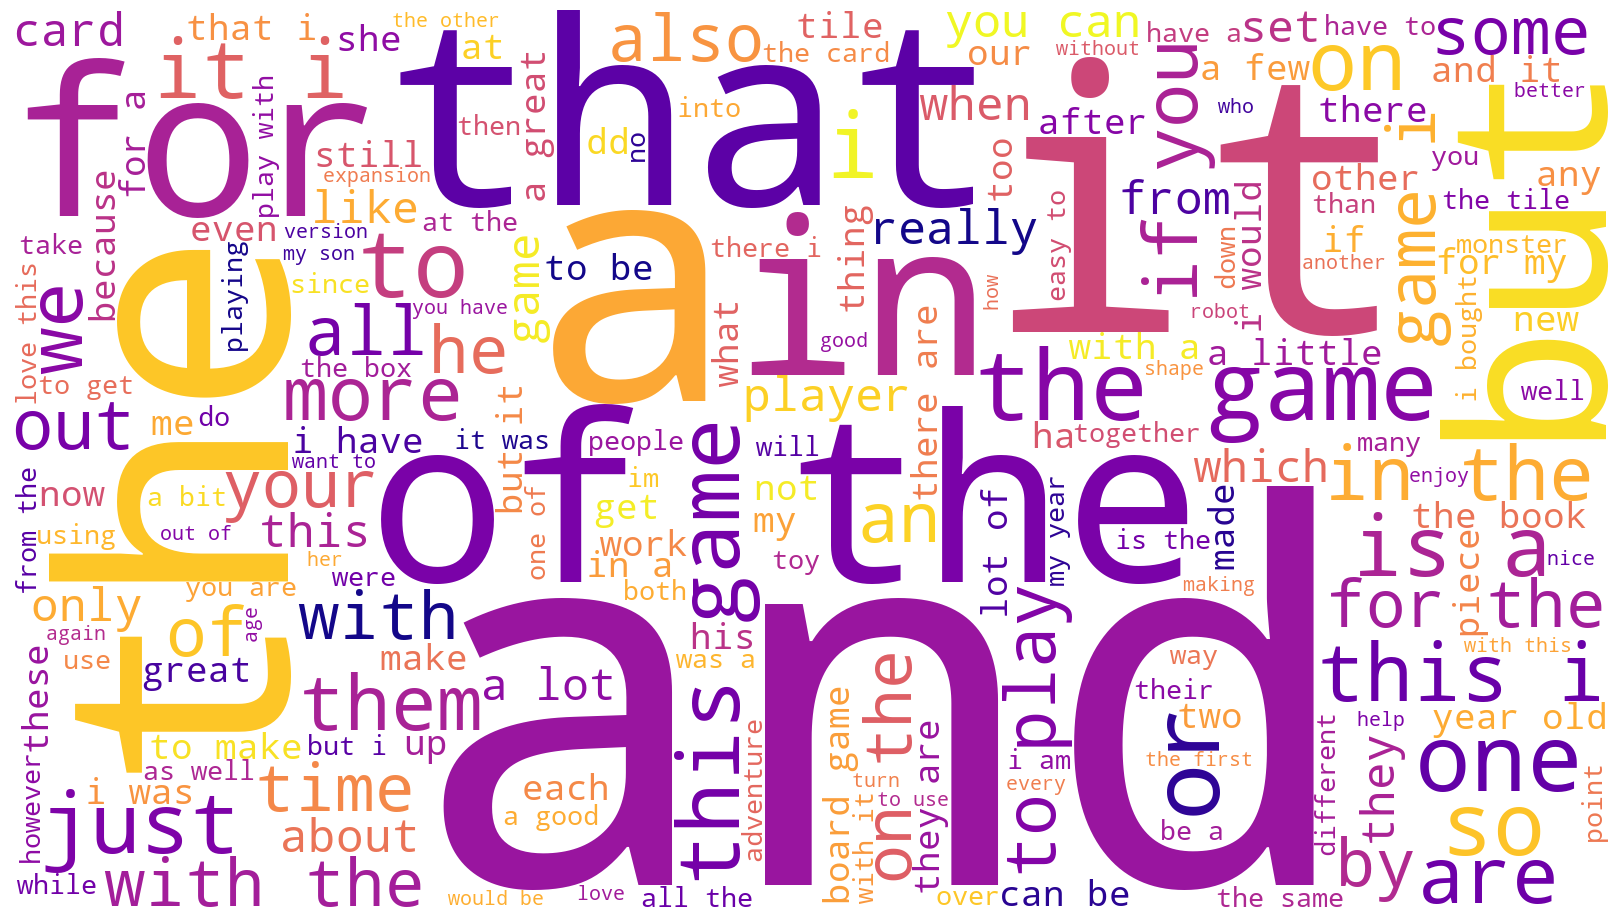

In [86]:
# Review: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(review_word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0)

# Save figure as .png file for later use.
plt.savefig('wordcloud_rev1.png', dpi=300, bbox_inches='tight');  # Semicolon to remove extraneous output.

**Word cloud of summaries:**

In [87]:
# Summary: Prepare text for word cloud.
summary_all_comments = ' '.join(reviews3['summary'])
# join is much more efficient than looping manually, 
# and also does not require pre-tokenisation, saving even more time.

# Preview new objects (first 1000 characters).
print("All comments from the summary column:")
print(summary_all_comments[0:1000], '...')

All comments from the summary column:
the fact that 50 of this space is wasted on art and not terribly informative or needed art  another worthless dungeon masters screen from galeforce9 pretty but also pretty useless five stars money trap best gm screen ever great but could be even better another missed opportunity not a value add to the product line love the map not a general dm screen very weak game fell completely flat good book buckley was a card mommer very advanced but as good as it gets you better know what youre getting into dont bother the worst value ive ever seen not enough product good product but temporary tattoos were good gift huge hit gorgeous pictures wonderful designs wow great coloring book nice book great pictures perfect well done my relaxation beautiful coloring book the pictures are great ive done one and gave it to a  great buy cant wait to work on this book stained glass perfection four stars so beautiful very nice three stars i like every image contained in t

In [88]:
# Summary: Create a word cloud.
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
summary_word_cloud = WordCloud(width = 1600, height = 900, 
                              background_color ='white',
                              colormap = 'plasma', 
                              stopwords = 'none',
                              min_font_size = 10).generate(summary_all_comments)

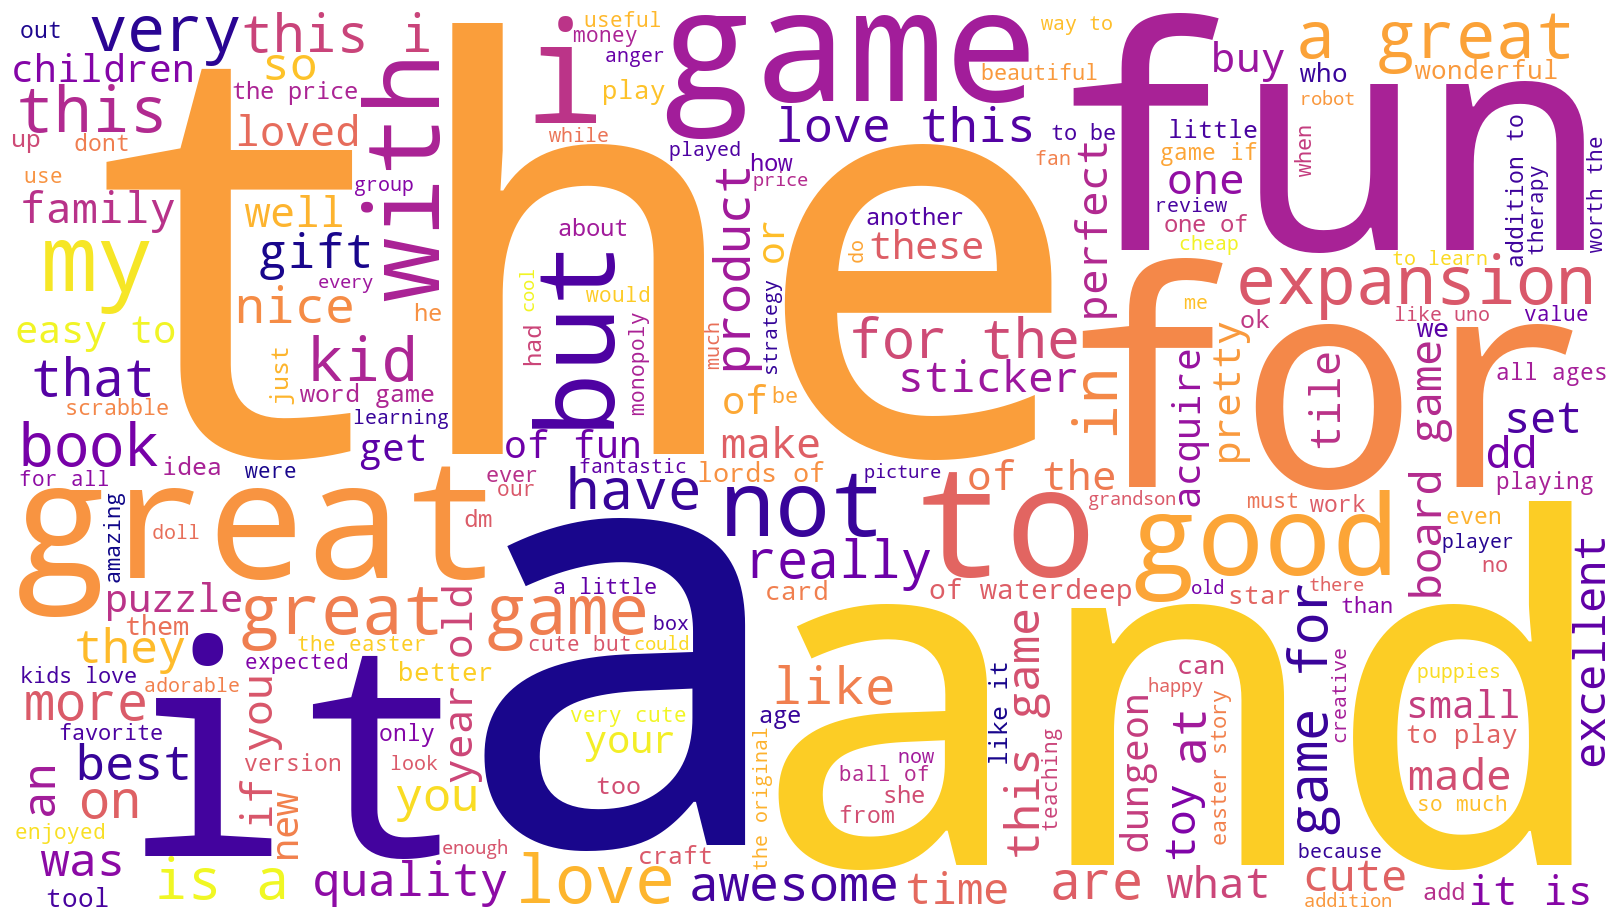

In [89]:
# Summary: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(summary_word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0)

# Save figure as .png file for later use.
plt.savefig('wordcloud_sum1.png', dpi=300, bbox_inches='tight');  # Semicolon to remove extraneous output.

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [90]:
# Determine the frequency distributions.
# Group all tokens into a single list.
review_all_tokens = list(itertools.chain.from_iterable(reviews3_tokens['review']))
summary_all_tokens = list(itertools.chain.from_iterable(reviews3_tokens['summary']))
# itertools function is faster and more eficient than looping manually.

# Calculate the frequency distributions.
review_fdist = FreqDist(review_all_tokens)
summary_fdist = FreqDist(summary_all_tokens)

# View data.
print("Frequency distribution of words in the review column:")
display(review_fdist)
print()  # Print blank line for clarity.
print("Frequency distribution of words in the summary column:")
display(summary_fdist)

Frequency distribution of words in the review column:


FreqDist({'the': 5019, 'and': 2934, 'to': 2843, 'a': 2829, 'of': 2261, 'i': 1887, 'it': 1830, 'is': 1593, 'this': 1549, 'for': 1360, ...})


Frequency distribution of words in the summary column:


FreqDist({'game': 268, 'the': 257, 'a': 238, 'great': 236, 'for': 229, 'to': 192, 'fun': 175, 'and': 168, 'it': 139, 'of': 131, ...})

### 4b) Remove alphanumeric characters and stopwords

In [91]:
# Filter out tokens that are neither alphabets nor numbers (keep only alphanumeric characters).
review_tokens = [word for word in review_all_tokens if word.isalnum()]
summary_tokens = [word for word in summary_all_tokens if word.isalnum()]

In [92]:
# Remove all the stopwords
# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
review_tokens2 = [x for x in review_tokens if x.lower() not in english_stopwords]
summary_tokens2 = [x for x in summary_tokens if x.lower() not in english_stopwords]

### 4c) Create wordcloud without stopwords

**Word cloud of reviews _without_ stopwords:**

In [93]:
# Review: Prepare text for word cloud.
review_all_tokens2 = ' '.join(review_tokens2)
# join is much more efficient than looping manually.

# Preview new objects (first 1000 characters).
print("All comments from the review column:")
print(review_all_tokens2[0:1000], '...')

All comments from the review column:
comes dms screen space screen absolute premium fact 50 space wasted art terribly informative needed art well makes completely useless reason gave 2 stars 1 technically speaking least still stand block notes dice rolls drops ball completely open letter galeforce9 unpainted miniatures bad spell cards great board games meh dm screens however freaking terrible im still waiting single screen isnt polluted pointless artwork useful referenceable tables youve created single use screen useful running storm kings thunder adventure even despite fact geared adventure path usefulness negligible best massive swath inner panel wasted artwork bloated overland map could easily reduced single panel size table nighuseless short stop making crap dm screens nice art nice printing two panels filled general forgotten realms map beyond one blue ocean waste dont understand cant make dm screens useful kinds adventures rather solely specific adventure youre supposed able tran

In [94]:
# Review: Create a word cloud.
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
review_word_cloud2 = WordCloud(width = 1600, height = 900, 
                               background_color ='white',
                               colormap = 'plasma', 
                               stopwords = 'none',
                               min_font_size = 10).generate(review_all_tokens2)

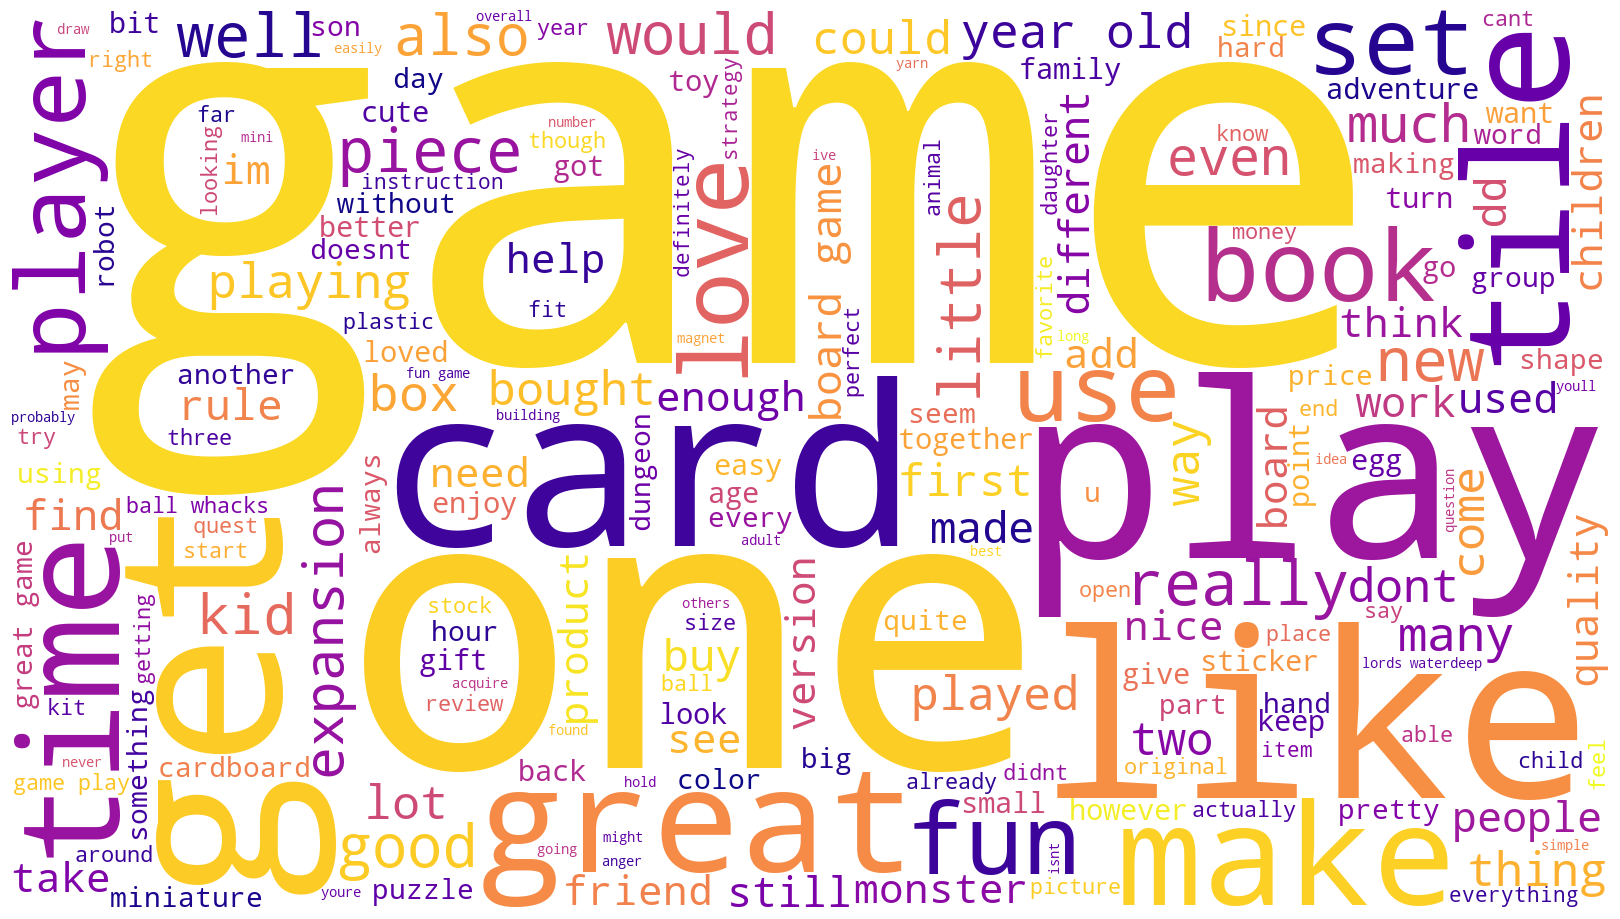

In [95]:
# Review: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(review_word_cloud2) 
plt.axis('off') 
plt.tight_layout(pad = 0)

# Save figure as .png file for later use.
plt.savefig('wordcloud_rev2.png', dpi=300, bbox_inches='tight');  # Semicolon to remove extraneous output.

**Word cloud of summaries _without_ stopwords:**

In [96]:
# Summary: Prepare text for word cloud.
summary_all_tokens2 = ' '.join(summary_tokens2)
# join is much more efficient than looping manually.

# Preview new objects (first 1000 characters).
print("All comments from the summary column:")
print(summary_all_tokens2[0:1000], '...')

All comments from the summary column:
fact 50 space wasted art terribly informative needed art another worthless dungeon masters screen galeforce9 pretty also pretty useless five stars money trap best gm screen ever great could even better another missed opportunity value add product line love map general dm screen weak game fell completely flat good book buckley card mommer advanced good gets better know youre getting dont bother worst value ive ever seen enough product good product temporary tattoos good gift huge hit gorgeous pictures wonderful designs wow great coloring book nice book great pictures perfect well done relaxation beautiful coloring book pictures great ive done one gave great buy cant wait work book stained glass perfection four stars beautiful nice three stars like every image contained stained glass coloring book creative stained glass pictures nice pictures great transaction drawings nice put windows great 30 minute toy great ok best fun robot themed gift 6 yr old 

In [97]:
# Summary: Create a word cloud.
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
summary_word_cloud2 = WordCloud(width = 1600, height = 900, 
                               background_color ='white',
                               colormap = 'plasma', 
                               stopwords = 'none',
                               min_font_size = 10).generate(summary_all_tokens2)

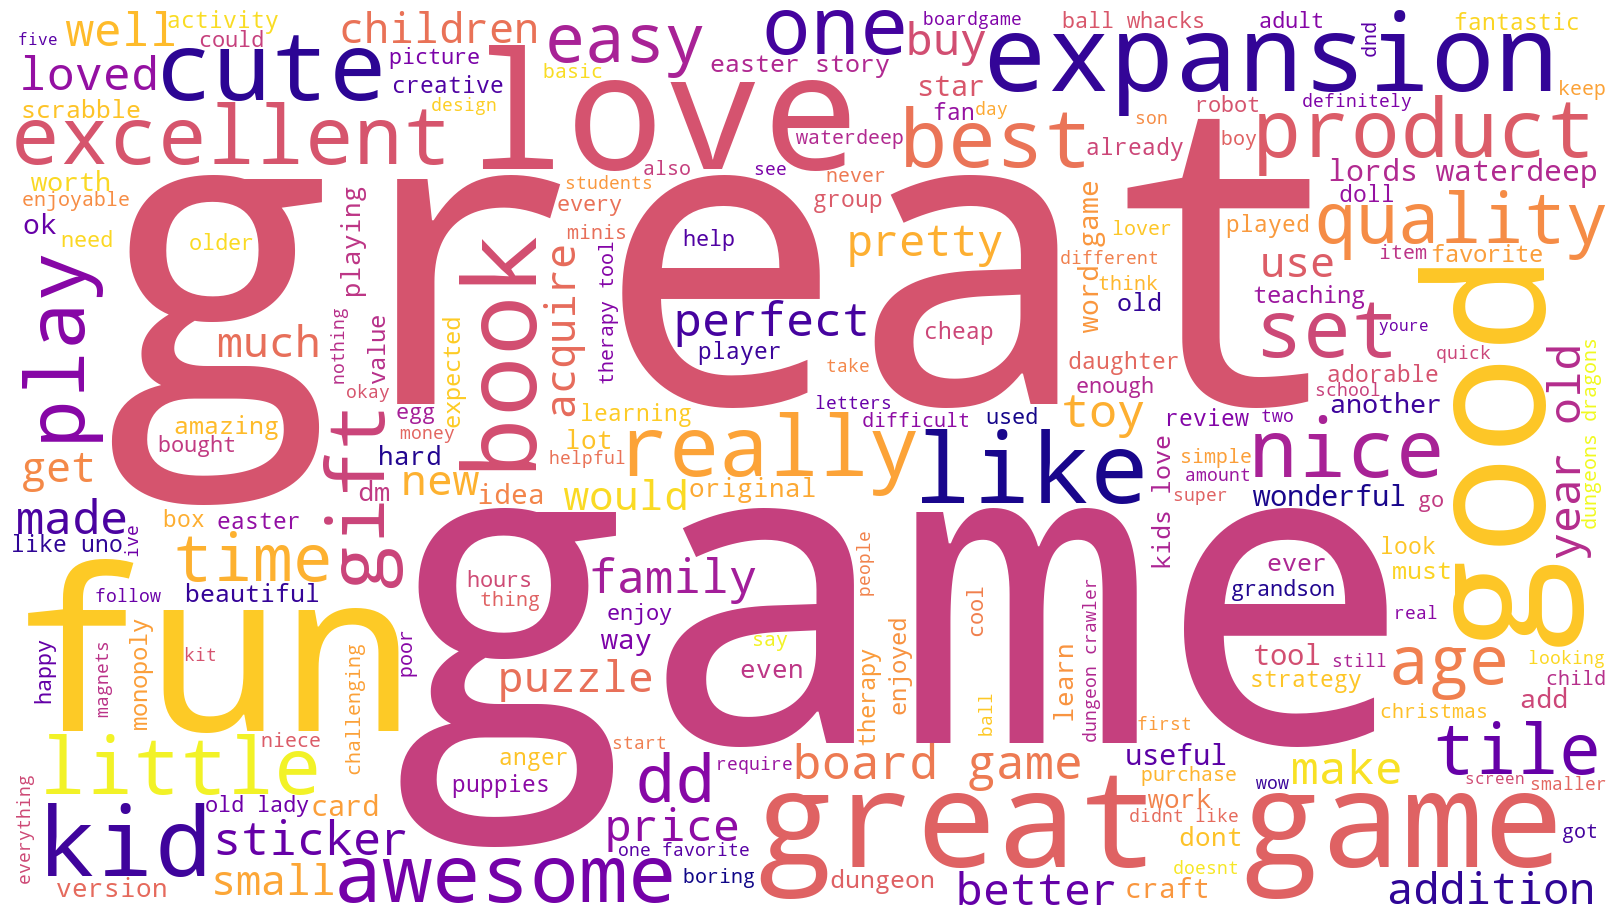

In [98]:
# Summary: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(summary_word_cloud2) 
plt.axis('off') 
plt.tight_layout(pad = 0)

# Save figure as .png file for later use.
plt.savefig('wordcloud_sum2.png', dpi=300, bbox_inches='tight');  # Semicolon to remove extraneous output.

### 4d) Identify 15 most common words and polarity

**Most-common words for review column:**

In [99]:
# Determine the 15 most common words.
# Calculate the frequency distribution.
review_fdist2 = FreqDist(review_tokens2)

# View data.
print("Frequency distribution of words in the review column (without stopwords):")
display(review_fdist2)

Frequency distribution of words in the review column (without stopwords):


FreqDist({'game': 1359, 'one': 475, 'play': 442, 'fun': 407, 'great': 391, 'like': 373, 'get': 293, 'cards': 281, 'tiles': 280, 'really': 278, ...})

In [100]:
# Generate DataFrame from Counter.
review_counts = pd.DataFrame(Counter(review_tokens2).most_common(15),
                             columns=['Word', 'Frequency']).set_index('Word')

# View data.
print("15 most-common words in the review column (without stopwords):")
display(review_counts)

15 most-common words in the review column (without stopwords):


Frequency
Word             
game         1359
one           475
play          442
fun           407
great         391
like          373
get           293
cards         281
tiles         280
really        278
book          259
would         252
well          246
time          244
new           237

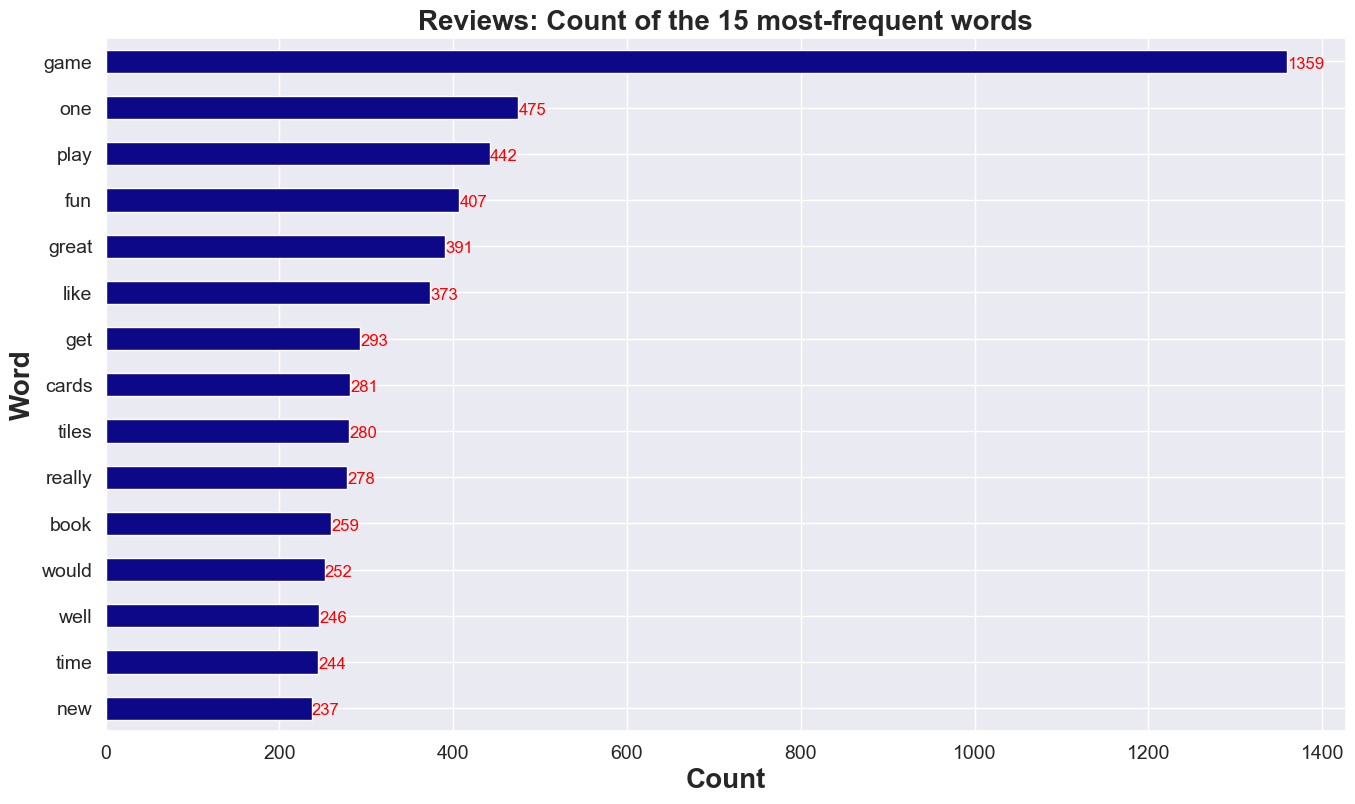

In [101]:
# Set the plot type.
ax = review_counts.sort_values('Frequency').plot(kind='barh', figsize=(16, 9), fontsize=14,
                                                 colormap ='plasma')

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')
    
# Remove redundant legend.
plt.legend().remove()

# Set the labels.
ax.set_xlabel('Count', weight='bold', fontsize=20)
ax.set_ylabel('Word', weight='bold', fontsize=20)
ax.set_title("Reviews: Count of the 15 most-frequent words",
             weight='bold', fontsize=20)

# Save figure as .png file for later use.
plt.savefig('bar_rev.png', dpi=300, bbox_inches='tight');  # Semicolon to remove extraneous output.

**Most-common words for summary column:**

In [102]:
# Determine the 15 most common words.
# Calculate the frequency distribution.
summary_fdist2 = FreqDist(summary_tokens2)

# View data.
print("Frequency distribution of words in the summary column (without stopwords):")
display(summary_fdist2)

Frequency distribution of words in the summary column (without stopwords):


FreqDist({'game': 268, 'great': 236, 'fun': 175, 'good': 84, 'love': 70, 'like': 54, 'kids': 48, 'book': 42, 'expansion': 42, 'cute': 40, ...})

In [103]:
# Generate DataFrame from Counter.
summary_counts = pd.DataFrame(Counter(summary_tokens2).most_common(15),
                              columns=['Word', 'Frequency']).set_index('Word')

# View data.
print("15 most-common words in the summary column (without stopwords):")
display(summary_counts)

15 most-common words in the summary column (without stopwords):


Frequency
Word                
game             268
great            236
fun              175
good              84
love              70
like              54
kids              48
book              42
expansion         42
cute              40
old               34
really            30
set               29
nice              28
one               28

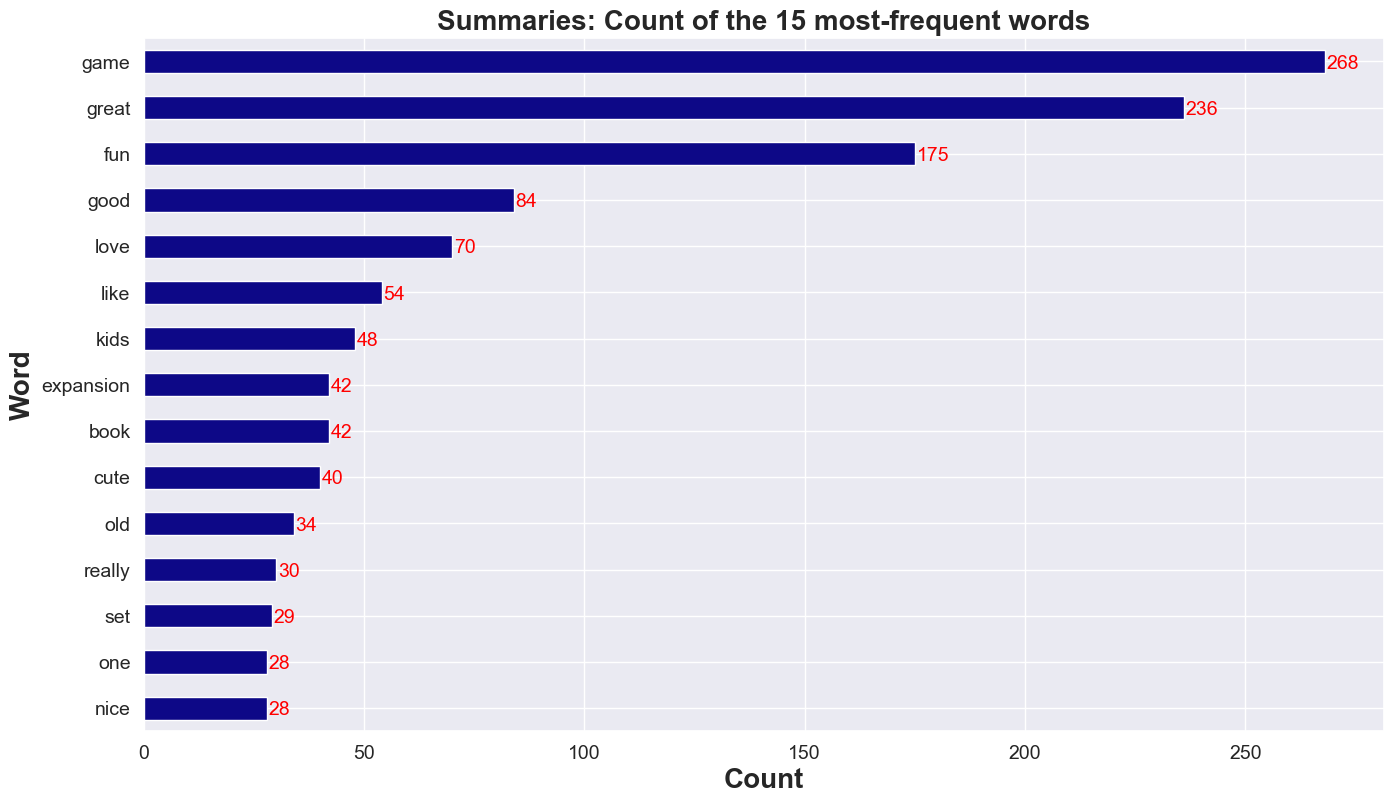

In [104]:
# Set the plot type.
ax = summary_counts.sort_values('Frequency').plot(kind='barh', figsize=(16, 9), fontsize=14,
                                                  colormap ='plasma')

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=14, color='red')
    
# Remove redundant legend.
plt.legend().remove()

# Set the labels and font sizes.
ax.set_xlabel('Count', weight='bold', fontsize=20)
ax.set_ylabel('Word', weight='bold', fontsize=20)
ax.set_title("Summaries: Count of the 15 most-frequent words",
             weight='bold', fontsize=20)

# Save figure as .png file for later use.
plt.savefig('bar_sum.png', dpi=300, bbox_inches='tight');  # Semicolon to remove extraneous output.

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

**Functions:**

In [105]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (between [-1, +1]) for each comment'''
    return TextBlob(comment).sentiment[0]

In [106]:
def generate_subjectivity(comment):
    '''Extract subjectivity score (between [0, 1]) for each comment'''
    return TextBlob(comment).sentiment[1]

**Outputs:**

In [107]:
# Determine polarity of both columns. 
# Populate new columns with polarity scores for each comment.
reviews3['review_polarity'] = reviews3['review'].apply(generate_polarity)
reviews3['summary_polarity'] = reviews3['summary'].apply(generate_polarity)

# View output.
display(reviews3[['review_polarity', 'summary_polarity']])

review_polarity  summary_polarity
0           -0.036111          0.150000
1            0.035952         -0.800000
2            0.116640          0.000000
3            0.578788          0.000000
4           -0.316667          0.000000
...               ...               ...
1344         0.250000         -0.050000
1345         0.171429         -0.400000
1346         0.155208          0.088889
1347         0.400000          0.200000
1348         0.168750          0.200000

[1349 rows x 2 columns]

In [108]:
# Determine subjectivity of both columns. 
# Populate new columns with subjectivity scores for each comment.
reviews3['review_subjectivity'] = reviews3['review'].apply(generate_subjectivity)
reviews3['summary_subjectivity'] = reviews3['summary'].apply(generate_subjectivity)

# View output.
display(reviews3[['review_subjectivity', 'summary_subjectivity']])

review_subjectivity  summary_subjectivity
0                0.486111              0.500000
1                0.442976              0.900000
2                0.430435              0.733333
3                0.784848              0.000000
4                0.316667              0.000000
...                   ...                   ...
1344             0.533333              0.300000
1345             0.290476              0.400000
1346             0.478125              0.583333
1347             0.633333              0.575000
1348             0.491667              0.550000

[1349 rows x 2 columns]

**Review sentiment polarity and subjectivity:**

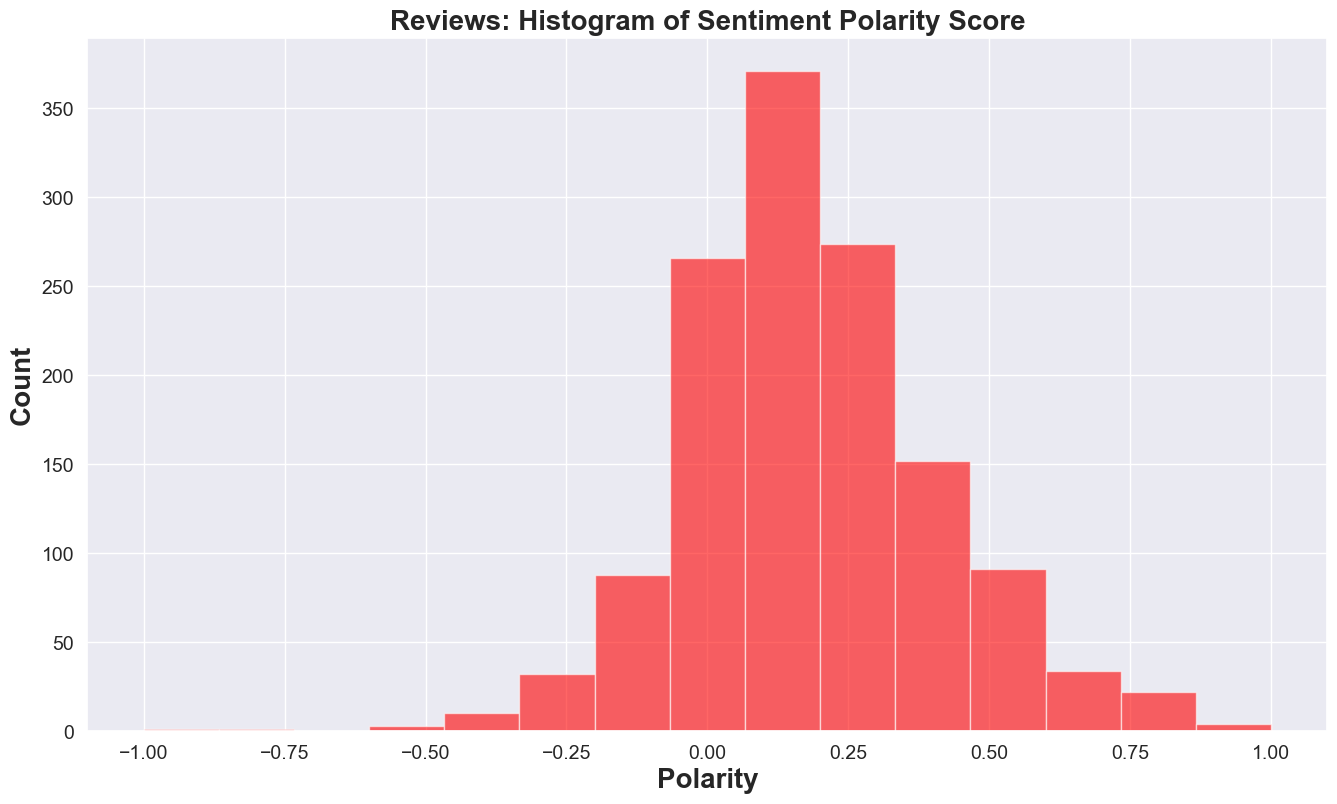

In [109]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity.
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(reviews3['review_polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels and font sizes.
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Polarity', weight='bold', fontsize=20)
plt.ylabel('Count', weight='bold', fontsize=20)

plt.title('Reviews: Histogram of Sentiment Polarity Score', 
          weight='bold', fontsize=20)

# Save figure as .png file for later use.
plt.savefig('hist_pol_rev.png', dpi=300, bbox_inches='tight');  # Semicolon to remove extraneous output.

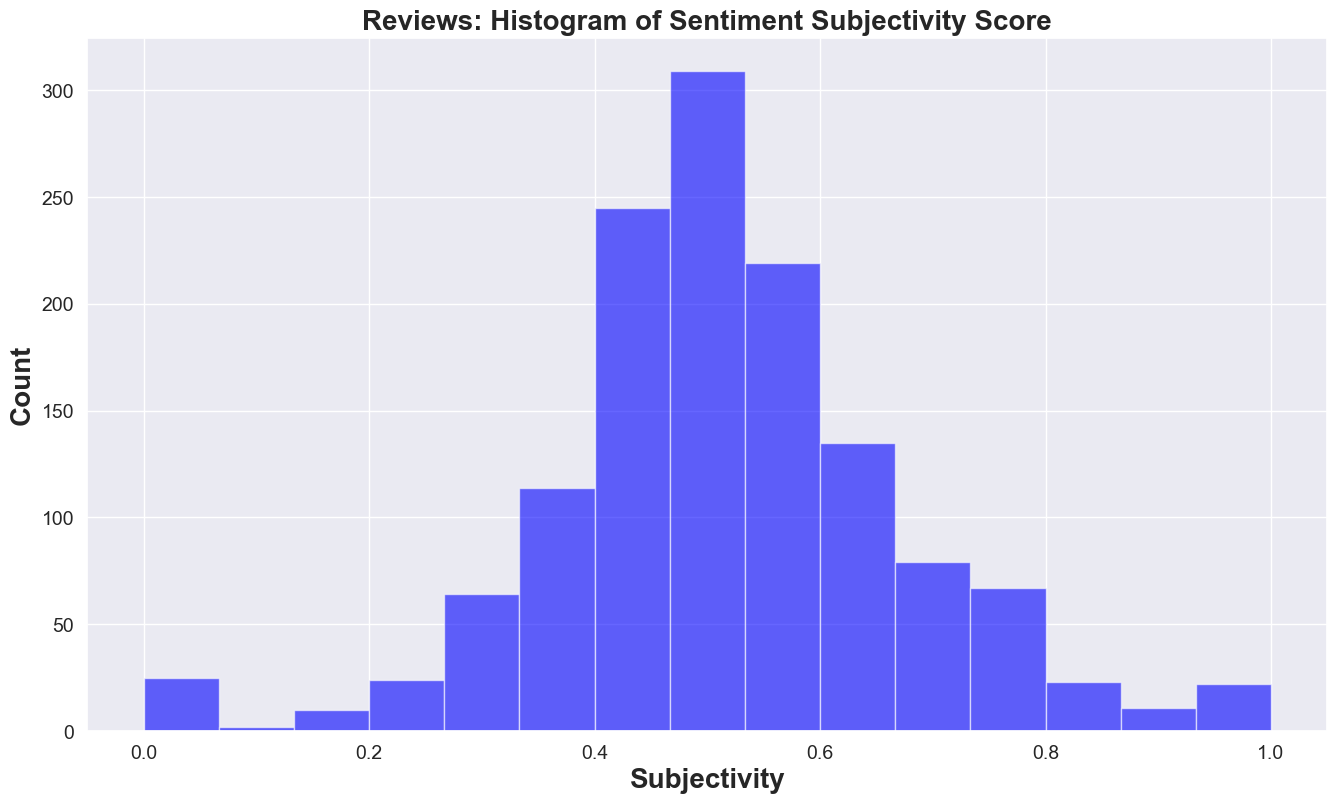

In [110]:
# Review: Create a histogram plot with bins = 15.
# Histogram of subjectivity.
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(reviews3['review_subjectivity'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels and font sizes.
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Subjectivity', weight='bold', fontsize=20)
plt.ylabel('Count', weight='bold', fontsize=20)

plt.title('Reviews: Histogram of Sentiment Subjectivity Score', 
          weight='bold', fontsize=20)

# Save figure as .png file for later use.
plt.savefig('hist_sent_rev.png', dpi=300, bbox_inches='tight');  # Semicolon to remove extraneous output.

**Summary sentiment polarity and subjectivity:**

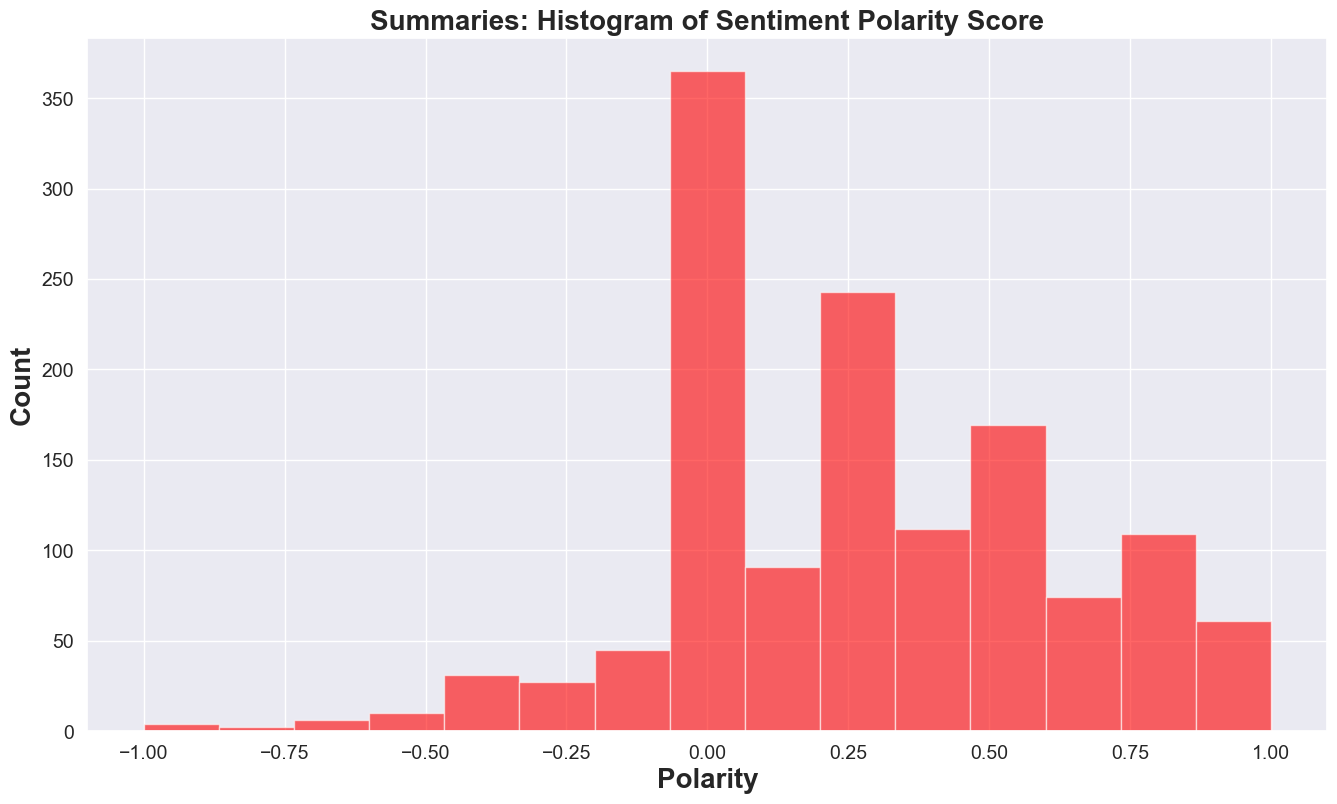

In [111]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity.
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(reviews3['summary_polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels and font sizes.
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Polarity', weight='bold', fontsize=20)
plt.ylabel('Count', weight='bold', fontsize=20)

plt.title('Summaries: Histogram of Sentiment Polarity Score', 
          weight='bold', fontsize=20)

# Save figure as .png file for later use.
plt.savefig('hist_pol_sum.png', dpi=300, bbox_inches='tight');  # Semicolon to remove extraneous output.

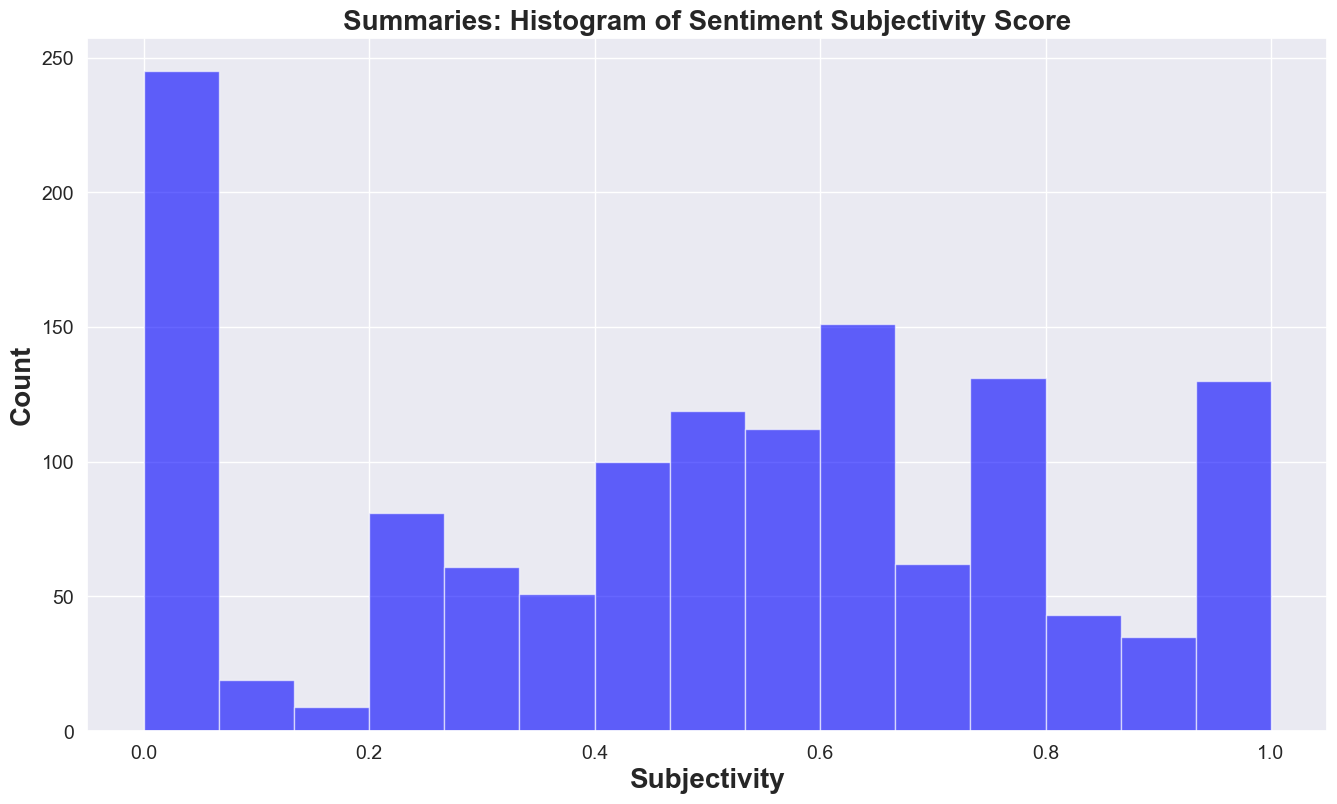

In [112]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of subjectivity.
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(reviews3['summary_subjectivity'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels and font sizes.
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Subjectivity', weight='bold', fontsize=20)
plt.ylabel('Count', weight='bold', fontsize=20)

plt.title('Summaries: Histogram of Sentiment Subjectivity Score', 
          weight='bold', fontsize=20)

# Save figure as .png file for later use.
plt.savefig('hist_sent_sum.png', dpi=300, bbox_inches='tight');  # Semicolon to remove extraneous output.

## 6. Identify top 20 positive and negative reviews and summaries respectively

**Negative Sentiments:**

In [113]:
# Top 20 negative reviews.
review_negative = reviews3.nsmallest(20, 'review_polarity')

# View output.
print("Most-Negative Reviews:")
display(review_negative[['review', 'review_polarity', 'review_subjectivity']])

Most-Negative Reviews:


review  review_polarity  \
165   booo unles you are patient know how to measure...        -1.000000   
147                   incomplete kit very disappointing        -0.780000   
267   one of my staff will be using this game soon s...        -0.550000   
90    i bought this as a christmas gift for my grand...        -0.500000   
141   i sent this product to my granddaughter the po...        -0.491667   
251   my 8 yearold granddaughter and i were very fru...        -0.446250   
382   i purchased this on the recommendation of two ...        -0.440741   
312   this game although it appears to be like uno a...        -0.400000   
355   my son loves playing this game it was recommen...        -0.400000   
713   if you like me used to play dd but now you and...        -0.400000   
1011  you can play the expansions one at a time or a...        -0.400000   
723   if you play dungeons and dragons then you will...        -0.393750   
600   i was a bit disappointed in the quality of the...        -0.365625   
331   very fun game to use with kids working on hand...        -0.352500   
297   i really like this game it helps kids recogniz...        -0.350000   
389   i am a therapist for children and this game is...        -0.333333   
338   confusing instructions and its not for 6 year ...        -0.325000   
4     as my review of gf9s previous screens these we...        -0.316667   
784   the adventures are tough but you can get throu...        -0.314815   
631   a crappy cardboard ghost of the original hard ...        -0.305556   

      review_subjectivity  
165              1.000000  
147              0.910000  
267              0.300000  
90               0.900000  
141              0.433333  
251              0.533750  
382              0.485185  
312              0.400000  
355              0.400000  
713              0.400000  
1011             0.400000  
723              0.550000  
600              0.709375  
331              0.265000  
297              0.450000  
389              0.300000  
338              0.531250  
4                0.316667  
784              0.507407  
631              0.763889

In [114]:
# Top 20 negative summaries.
summary_negative = reviews3.nsmallest(20, 'summary_polarity')

# View output.
print("Most-Negative Summaries:")
display(summary_negative[['summary', 'summary_polarity', 'summary_subjectivity']])

Most-Negative Summaries:


summary  summary_polarity  \
17                        the worst value ive ever seen         -1.000000   
165    boring unless you are a craft person which i am          -1.000000   
587                                              boring         -1.000000   
837   before this i hated running any rpg campaign d...         -0.900000   
1     another worthless dungeon masters screen from ...         -0.800000   
116                                        disappointed         -0.750000   
266   promotes anger instead of teaching calming met...         -0.700000   
634            too bad this is not what i was expecting         -0.700000   
637                        bad qualityall made of paper         -0.700000   
144     at age 31 i found these very difficult to make          -0.650000   
75                                     small and boring         -0.625000   
368                                          mad dragon         -0.625000   
575                                       disappointing         -0.600000   
723   then you will find this board game to be dumb ...         -0.591667   
267                                  anger control game         -0.550000   
59                            really small disappointed         -0.500000   
360                               its uno for the angry         -0.500000   
646           50th anniversary is a sad day for acquire         -0.500000   
808                           a disappointing coop game         -0.500000   
1116  its also really lame that the doll didnt come ...         -0.500000   

      summary_subjectivity  
17                1.000000  
165               1.000000  
587               1.000000  
837               0.700000  
1                 0.900000  
116               0.750000  
266               0.200000  
634               0.666667  
637               0.666667  
144               1.000000  
75                0.700000  
368               1.000000  
575               0.700000  
723               0.633333  
267               0.300000  
59                0.575000  
360               1.000000  
646               1.000000  
808               0.550000  
1116              0.750000

**Positive Sentiments:**

In [115]:
# Top 20 positive reviews.
review_positive = reviews3.nlargest(20, 'review_polarity')

# View output.
print("Most-Positive Reviews:")
display(review_positive[['review', 'review_polarity', 'review_subjectivity']])

Most-Positive Reviews:


review  review_polarity  \
564                                             perfect         1.000000   
1080  my daughter loves her stickers awesome seller ...         1.000000   
1334       perfect for tutoring my grandson in spelling         1.000000   
890   the best part i see is the box what a wonderfu...         0.880000   
498   great quality very cute and perfect for my tod...         0.816667   
31    the pictures are great  ive done one and gave ...         0.800000   
336       great seller happy with my purchase 5 starrrr         0.800000   
439                          great easter gift for kids         0.800000   
491                                     these are great         0.800000   
692   bought this because i wanted it all these dd g...         0.800000   
824                         husband seems happy with it         0.800000   
826         great accessory to use with the playing mat         0.800000   
828   great price arrived on time with no damage wil...         0.800000   
893   this is a great accessory to the starter set i...         0.800000   
1075  my granddaughter loves these so happy to find ...         0.800000   
1113  great doll to go with the book  animals cant w...         0.800000   
1187      a great creation tool it helps me concentrate         0.800000   
1287                 prompt service and a great product         0.800000   
1333  this is a great tool to have at hand when play...         0.800000   
325   this is a great product i use it as a therapeu...         0.790000   

      review_subjectivity  
564              1.000000  
1080             1.000000  
1334             1.000000  
890              0.860000  
498              0.916667  
31               0.750000  
336              0.875000  
439              0.750000  
491              0.750000  
692              0.750000  
824              1.000000  
826              0.750000  
828              0.750000  
893              0.750000  
1075             1.000000  
1113             0.750000  
1187             0.750000  
1287             0.750000  
1333             0.750000  
325              0.875000

In [116]:
# Top 20 positive summaries.
summary_positive = reviews3.nlargest(20, 'summary_polarity')

# View output.
print("Most-Positive Summaries:")
display(summary_positive[['summary', 'summary_polarity', 'summary_subjectivity']])

Most-Positive Summaries:


summary  summary_polarity  \
5                                  best gm screen ever               1.0   
23                                   wonderful designs               1.0   
27                                             perfect               1.0   
61   theyre the perfect size to keep in the car or ...               1.0   
107                            perfect for preschooler               1.0   
112             awesome sticker activity for the price               1.0   
132                                       awesome book               1.0   
133                    he was very happy with his gift               1.0   
150                                            awesome               1.0   
166           awesome and welldesigned for 9 year olds               1.0   
337                                          excellent               1.0   
389                             excellent therapy tool               1.0   
407  the pigeon is the perfect addition to a school...               1.0   
423                          best easter teaching tool               1.0   
462                                          wonderful               1.0   
466              all f the mudpuppy toys are wonderful               1.0   
471                                     awesome puzzle               1.0   
476                               not the best quality               1.0   
514                                   excellent puzzle               1.0   
521                       the best feedback i can have               1.0   

     summary_subjectivity  
5                     0.3  
23                    1.0  
27                    1.0  
61                    1.0  
107                   1.0  
112                   1.0  
132                   1.0  
133                   1.0  
150                   1.0  
166                   1.0  
337                   1.0  
389                   1.0  
407                   1.0  
423                   0.3  
462                   1.0  
466                   1.0  
471                   1.0  
476                   0.3  
514                   1.0  
521                   0.3

## 7.  Subjectivity vs Polarity

**Reviews:**

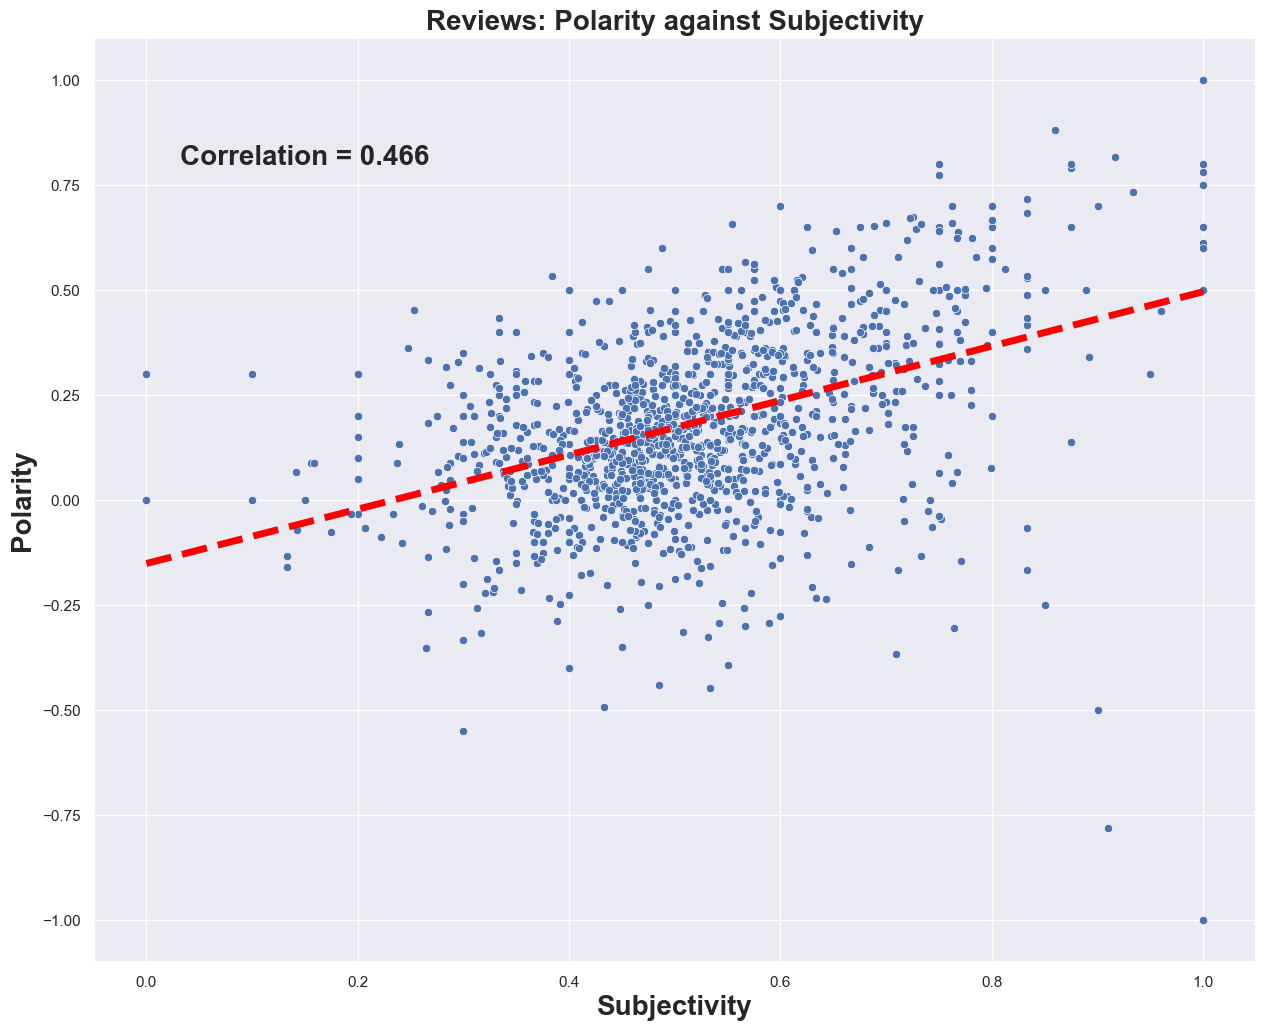

In [117]:
# Plot the graph with a regression line.
# Plot the data points with a scatterplot.
ax1 = sns.scatterplot(reviews3['review_subjectivity'], reviews3['review_polarity'],
                      ci=None)

# Plot the regression line (in red).
ax2 = sns.lineplot(np.unique(reviews3['review_subjectivity']), 
                   np.poly1d(np.polyfit(reviews3['review_subjectivity'], 
                                        reviews3['review_polarity'], 1))(np.unique(reviews3['review_subjectivity'])), 
                   color='red',
                   linewidth=5, linestyle='dashed',
                   ci=None)

# Add comment on correlation.
c = round(reviews3['review_subjectivity'].corr(reviews3['review_polarity']), 3)
ax1.annotate(f'Correlation = {c}', 
             xy=(0.15,0.8),
             horizontalalignment='center', fontsize=20, weight='bold')

# Adjust x axis.
plt.xlabel("Subjectivity", weight='bold', size=20)
plt.xlim()
# Adjust y axis
plt.ylabel("Polarity", weight='bold', size=20)
plt.ylim()

# Adjust x ticks.
#xtick_positions = range(0, 100+10, 10)
#plt.xticks(xtick_positions, fontsize=14)
# Adjust y ticks.
#ytick_positions = range(0, int(7e3)+int(1e3), int(1e3))
#ytick_labels = [f'{round(float(x)/1e3)}K' for x in ytick_positions]
#plt.yticks(ytick_positions, ytick_labels, fontsize=14)

plt.title('Reviews: Polarity against Subjectivity', 
          weight='bold', fontsize=20)

# Save figure as .png file for later use.
plt.savefig('cor_pol_sent_rev.png', dpi=300, bbox_inches='tight');  # Semicolon to remove extraneous output.

**Summaries:**

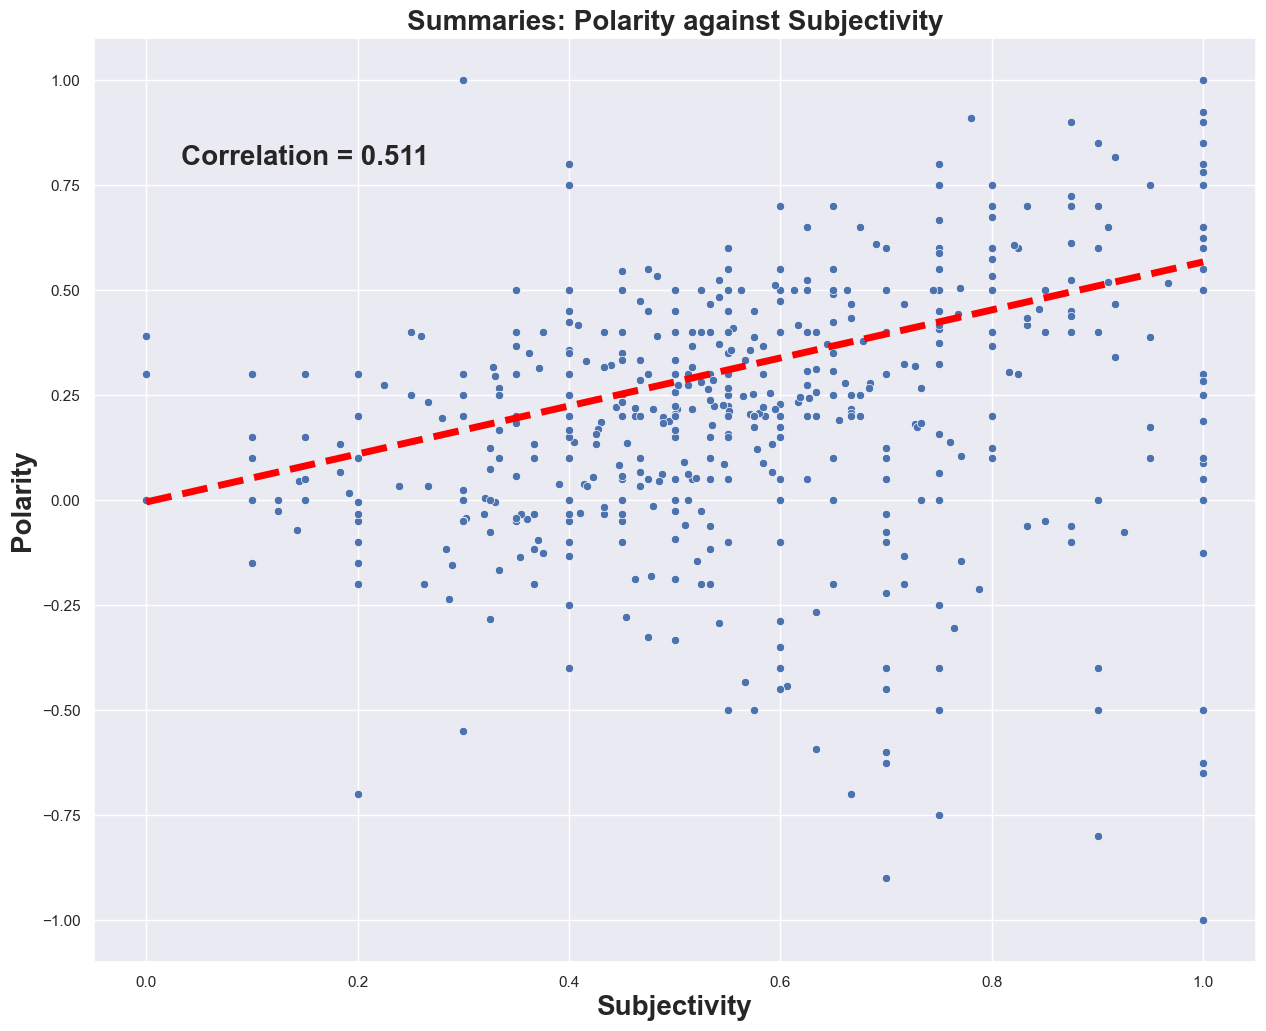

In [118]:
# Plot the graph with a regression line.
# Plot the data points with a scatterplot.
ax1 = sns.scatterplot(reviews3['summary_subjectivity'], reviews3['summary_polarity'],
                      ci=None)

# Plot the regression line (in red).
ax2 = sns.lineplot(np.unique(reviews3['summary_subjectivity']), 
                   np.poly1d(np.polyfit(reviews3['summary_subjectivity'], 
                                        reviews3['summary_polarity'], 1))(np.unique(reviews3['summary_subjectivity'])), 
                   color='red',
                   linewidth=5, linestyle='dashed',
                   ci=None)

# Add comment on correlation.
c = round(reviews3['summary_subjectivity'].corr(reviews3['summary_polarity']), 3)
ax1.annotate(f'Correlation = {c}', 
             xy=(0.15,0.8),
             horizontalalignment='center', fontsize=20, weight='bold')

# Adjust x axis.
plt.xlabel("Subjectivity", weight='bold', size=20)
plt.xlim()
# Adjust y axis
plt.ylabel("Polarity", weight='bold', size=20)
plt.ylim()

# Adjust x ticks.
#xtick_positions = range(0, 100+10, 10)
#plt.xticks(xtick_positions, fontsize=14)
# Adjust y ticks.
#ytick_positions = range(0, int(7e3)+int(1e3), int(1e3))
#ytick_labels = [f'{round(float(x)/1e3)}K' for x in ytick_positions]
#plt.yticks(ytick_positions, ytick_labels, fontsize=14)

plt.title('Summaries: Polarity against Subjectivity', 
          weight='bold', fontsize=20)

# Save figure as .png file for later use.
plt.savefig('cor_pol_sent_sum.png', dpi=300, bbox_inches='tight');  # Semicolon to remove extraneous output.

## 8. Stemming and Lemmatisation

**Functions:**

In [119]:
def word_stem(word_list):
    # Create a stemming object.
    snow_stem = SnowballStemmer(language='english')
    
    # Create empty list to hold stemmed words
    stem_list = []
    
    # Apply the stemming process to each word.
    for word in word_list:
        stem_list.append(snow_stem.stem(word))
        
    return stem_list

In [120]:
def word_lem(word_list):
    # Create a stemming object.
    lemmatiser = WordNetLemmatizer()
    
    # Create empty list to hold stemmed words
    lem_list = []
    
    # Apply the stemming process to each word.
    for word in word_list:
        lem_list.append(lemmatiser.lemmatize(word))
        
    return lem_list

**Outputs:**

In [121]:
# Create empty DatFrame to store original and stemmed words.
review_norm = pd.DataFrame()
summary_norm = pd.DataFrame()

# Populate with original words.
review_norm['word'] = review_tokens2
summary_norm['word'] = summary_tokens2

# Populate with stemmed words.
review_norm['stem'] = word_stem(review_tokens2)
summary_norm['stem'] = word_stem(summary_tokens2)

# Populate with lemmatised words.
review_norm['lem'] = word_lem(review_tokens2)
summary_norm['lem'] = word_lem(summary_tokens2)

# View outputs.
print("Stemmed and Lemmatised words in reviews:")
display(review_norm.head(20))
print("Stemmed and Lemmatised words in summaries:")
display(summary_norm.head(20))

Stemmed and Lemmatised words in reviews:


word     stem          lem
0         comes     come         come
1           dms      dms           dm
2        screen   screen       screen
3         space    space        space
4        screen   screen       screen
5      absolute  absolut     absolute
6       premium  premium      premium
7          fact     fact         fact
8            50       50           50
9         space    space        space
10       wasted     wast       wasted
11          art      art          art
12     terribly  terribl     terribly
13  informative   inform  informative
14       needed     need       needed
15          art      art          art
16         well     well         well
17        makes     make         make
18   completely  complet   completely
19      useless  useless      useless

Stemmed and Lemmatised words in summaries:


word        stem          lem
0          fact        fact         fact
1            50          50           50
2         space       space        space
3        wasted        wast       wasted
4           art         art          art
5      terribly     terribl     terribly
6   informative      inform  informative
7        needed        need       needed
8           art         art          art
9       another       anoth      another
10    worthless   worthless    worthless
11      dungeon     dungeon      dungeon
12      masters      master       master
13       screen      screen       screen
14   galeforce9  galeforce9   galeforce9
15       pretty      pretti       pretty
16         also        also         also
17       pretty      pretti       pretty
18      useless     useless      useless
19         five        five         five

Stemming and lemmatising are potentially useful, but these particular methods have glaring limitations. Stemming sometimes shortens words to nonwords (or non-useful words), and lemmatising does not always catch words that are not within the provided corpus. In order to maintain consistency, we will _not_ stem or lemmatise words for this particular analysis.

## 9. Discuss: Insights and observations

**Key Observations:**

> - The modal review polarity is slightly positive (slightly above 0), and the modal review subjectivity is moderately subjective (roughly 0.5). 
> - The modal summary polarity is slightly positive (roughly 0), and the modal summary subjectivity is nonsubjective (roughly 0).
> - The review polarity distribution has a gaussian-like shape (normally distributed), with a slight positive skew, and the review subjectivity distribution is also normally distributed, with a slight positive skew.
> - The summary polarity distribution is not gaussian-like in shape, with a strong positive skew, and the review subjectivity distribution is somewhat bimodally distributed, with a peak at roughly 0, and another, albeit weaker, peak at roughly 0.6.
> - There is a moderate correlation between subjectivity and polarity for both reviews (0.47) and summaries (0.511). This is not strong enough to make confident predictions, but it is interesting to note.

# 